In [78]:
import sys
sys.path.insert(1, '/Users/madisonthantu/Desktop/DREAM/t-recs')

import trecs

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from collections import defaultdict
sys.path.insert(1, '/Users/madisonthantu/Desktop/DREAM/T-RECS-RS-research')
from src.chaney_utils import (
    load_sim_results,
    graph_relative_to_ideal,
    merge_results,
    graph_metrics,
    graph_metrics_by_axis,
    graph_relative_to_global_by_axis,
    transform_relative_to_global,
    graph_histogram_metric_by_axis
)
import warnings
warnings.simplefilter("ignore")

import itertools

In [79]:
DEBUG = True # don't save figures

In [80]:
results_path = "param_exp_results/10train90run/"
results_file = "sim_results.pkl"
environment_file = "sim_environment.pkl"

results = merge_results([results_path], [results_file])
print(results.keys())

model_keys = ['0.0drift_0attention_0retraining', '0.0drift_0attention_1retraining', '0.0drift_-0.8attention_0retraining', '0.0drift_-0.8attention_1retraining', '0.05drift_0attention_0retraining', '0.05drift_0attention_1retraining', '0.05drift_-0.8attention_0retraining', '0.05drift_-0.8attention_1retraining', '0.1drift_0attention_0retraining', '0.1drift_0attention_1retraining', '0.1drift_-0.8attention_0retraining', '0.1drift_-0.8attention_1retraining']
print(model_keys)

id_to_readable = dict(zip(model_keys, model_keys))
print(id_to_readable)

dict_keys(['mse', 'interaction_spread', 'global_interaction_similarity', 'inter_cluster_interaction_similarity', 'intra_cluster_interaction_similarity', 'mean_global_cosine_sim', 'mean_intra_cluster_cosine_sim', 'mean_inter_cluster_cosine_sim', 'mean_cosine_sim_per_cluster', 'mean_cluster_distance_from_centroid', 'mean_global_distance_from_centroid', 'mean_distance_from_centroid_per_cluster'])
['0.0drift_0attention_0retraining', '0.0drift_0attention_1retraining', '0.0drift_-0.8attention_0retraining', '0.0drift_-0.8attention_1retraining', '0.05drift_0attention_0retraining', '0.05drift_0attention_1retraining', '0.05drift_-0.8attention_0retraining', '0.05drift_-0.8attention_1retraining', '0.1drift_0attention_0retraining', '0.1drift_0attention_1retraining', '0.1drift_-0.8attention_0retraining', '0.1drift_-0.8attention_1retraining']
{'0.0drift_0attention_0retraining': '0.0drift_0attention_0retraining', '0.0drift_0attention_1retraining': '0.0drift_0attention_1retraining', '0.0drift_-0.8atten

In [81]:
hyper_params = {"drift":[0.0, 0.05, 0.1], "attention_exp":[0, -0.8], "repeated_training":[0,1]}
models = dict([(f"{p[0]}drift_{p[1]}attention_{p[2]}retraining", p) for p in itertools.product(*hyper_params.values())])

results_df = pd.DataFrame(columns=["drift", "attention_exp", "repeated_training"] + list(results.keys()))
results_df

for params in model_keys:
    df = pd.DataFrame(columns=["drift", "attention_exp", "repeated_training"] + list(results.keys()))
    for metric in results:
        metric_results = [vals for sim_trial in results[metric][params] for vals in sim_trial]
        df[metric] = metric_results
    df["drift"] = models[params][0]
    df["attention_exp"] = models[params][1]
    df["repeated_training"] = models[params][2]
    results_df = pd.concat([results_df, df])

In [82]:
y_labels = dict([
    ("mse", "mse"), 
    ("interaction_spread", "interaction spread"), 
    ("global_interaction_similarity", "average jacard similarity"), 
    ("inter_cluster_interaction_similarity", "average jacard similarity"), 
    ("intra_cluster_interaction_similarity", "average jacard similarity"), 
    ("mean_global_cosine_sim", "average cosine sim"),
    ("mean_intra_cluster_cosine_sim", "average cosine sim"),
    ("mean_inter_cluster_cosine_sim", "average cosine sim"),
    ("mean_cosine_sim_per_cluster", "average cosine sim"),
    ("mean_cluster_distance_from_centroid", "distance"),
    ("mean_global_distance_from_centroid", "distance"),
    ("mean_distance_from_centroid_per_cluster", "distance"),
])

model_key_pairs = [(model_keys[i], model_keys[i+1]) for i in range(0, len(model_keys), 2)]

single_training_keys = [key[0] for key in model_key_pairs]
repeated_training_keys = [key[1] for key in model_key_pairs]

# Graphing `MSE`

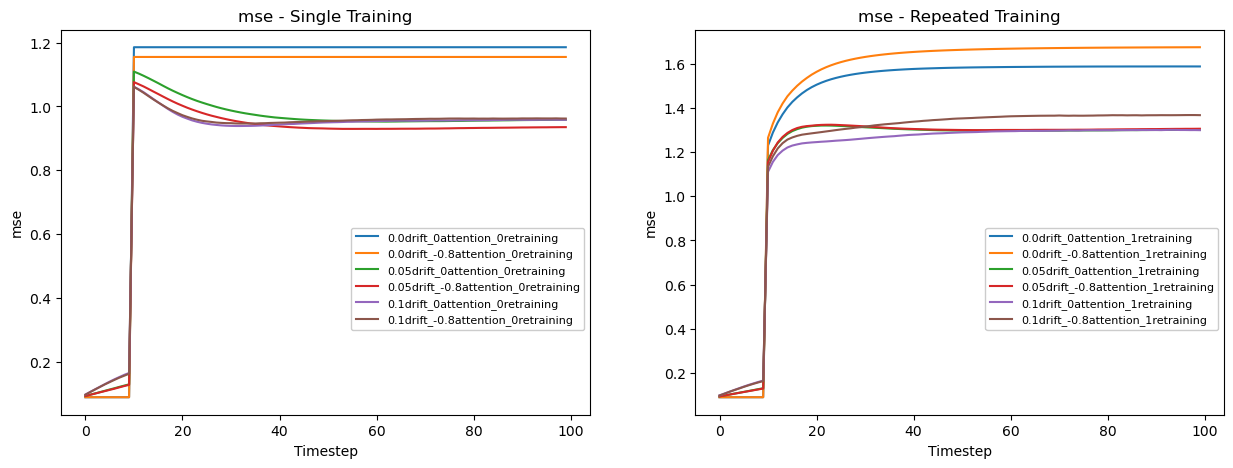

In [83]:
metric_key = "mse"

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

graph_metrics_by_axis(axs[0], results, metric_key, single_training_keys, id_to_readable, mult_sd=0)
axs[0].set_ylabel(y_labels[metric_key])
axs[0].set_xlabel("Timestep")
axs[0].set_title(f"{metric_key} - Single Training")
axs[0].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

graph_metrics_by_axis(axs[1], results, metric_key, repeated_training_keys, id_to_readable, mult_sd=0)
axs[1].set_ylabel(y_labels[metric_key])
axs[1].set_xlabel("Timestep")
axs[1].set_title(f"{metric_key} - Repeated Training")
axs[1].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

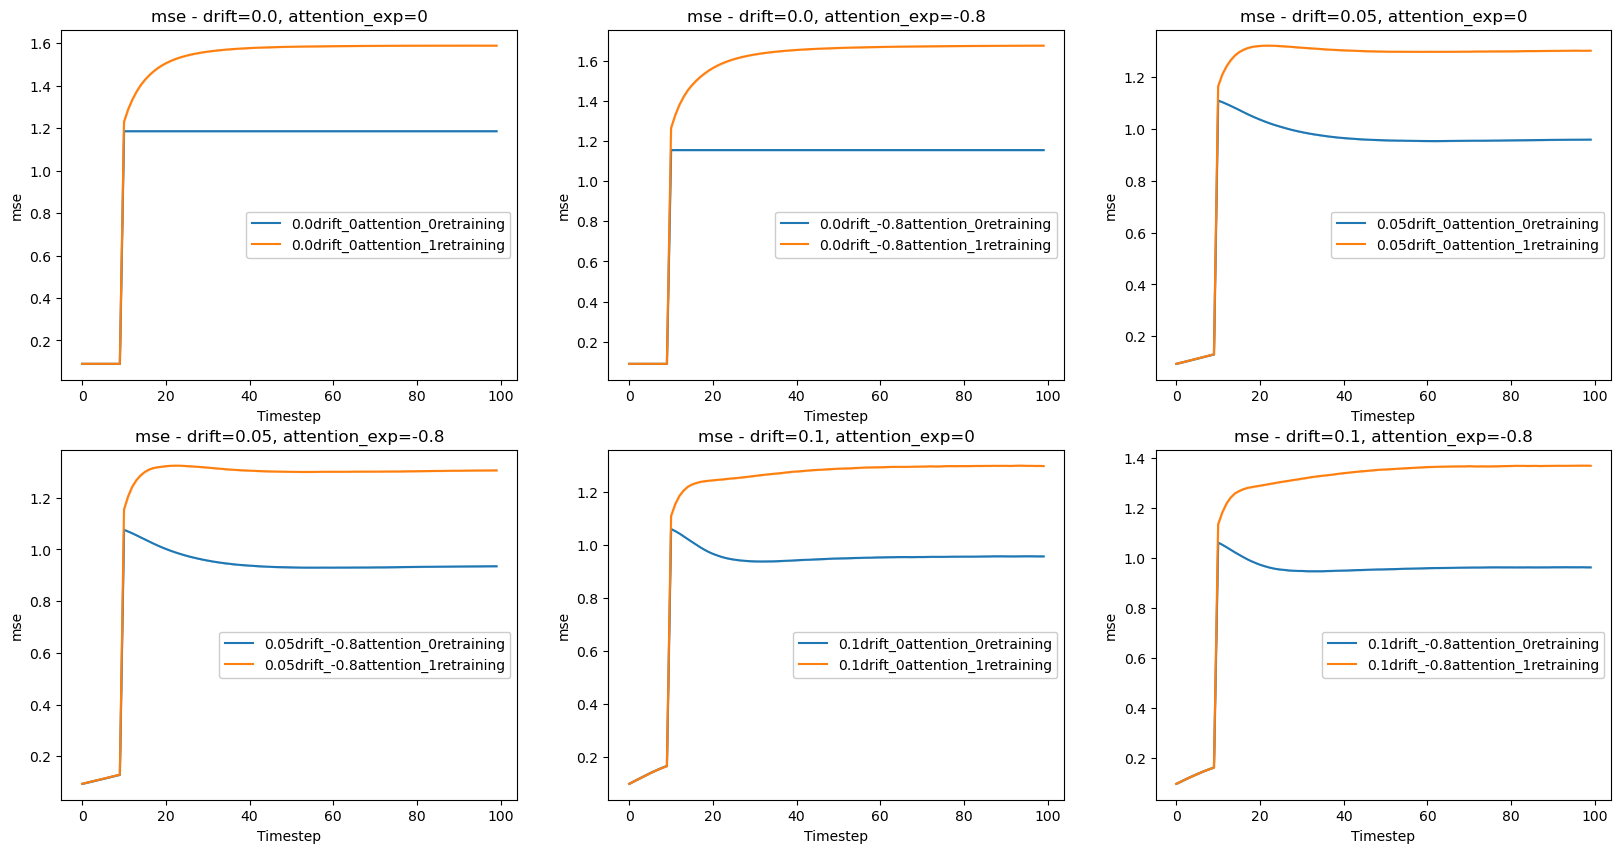

In [84]:
metric_key = "mse"

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_metrics_by_axis(curr_ax, results, metric_key, model_key_pairs[i], id_to_readable, mult_sd=0.5)
    curr_ax.set_ylabel(y_labels[metric_key])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{metric_key} - drift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")

# Graphing `Interaction Similarity`

### Graphing `Global Interaction Similarity`

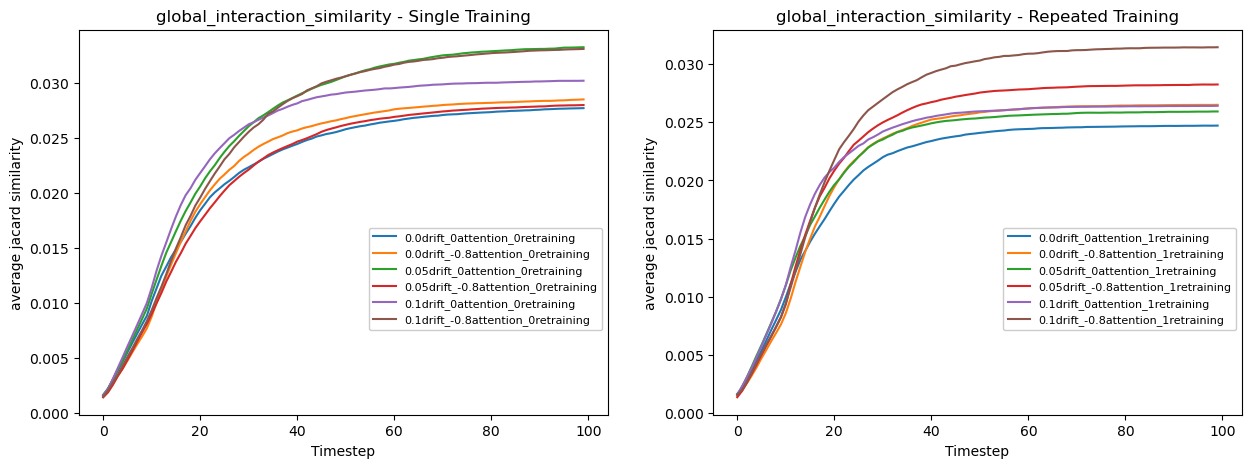

In [85]:
metric_key = "global_interaction_similarity"

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

graph_metrics_by_axis(axs[0], results, metric_key, single_training_keys, id_to_readable, mult_sd=0)
axs[0].set_ylabel(y_labels[metric_key])
axs[0].set_xlabel("Timestep")
axs[0].set_title(f"{metric_key} - Single Training")
axs[0].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

graph_metrics_by_axis(axs[1], results, metric_key, repeated_training_keys, id_to_readable, mult_sd=0)
axs[1].set_ylabel(y_labels[metric_key])
axs[1].set_xlabel("Timestep")
axs[1].set_title(f"{metric_key} - Repeated Training")
axs[1].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

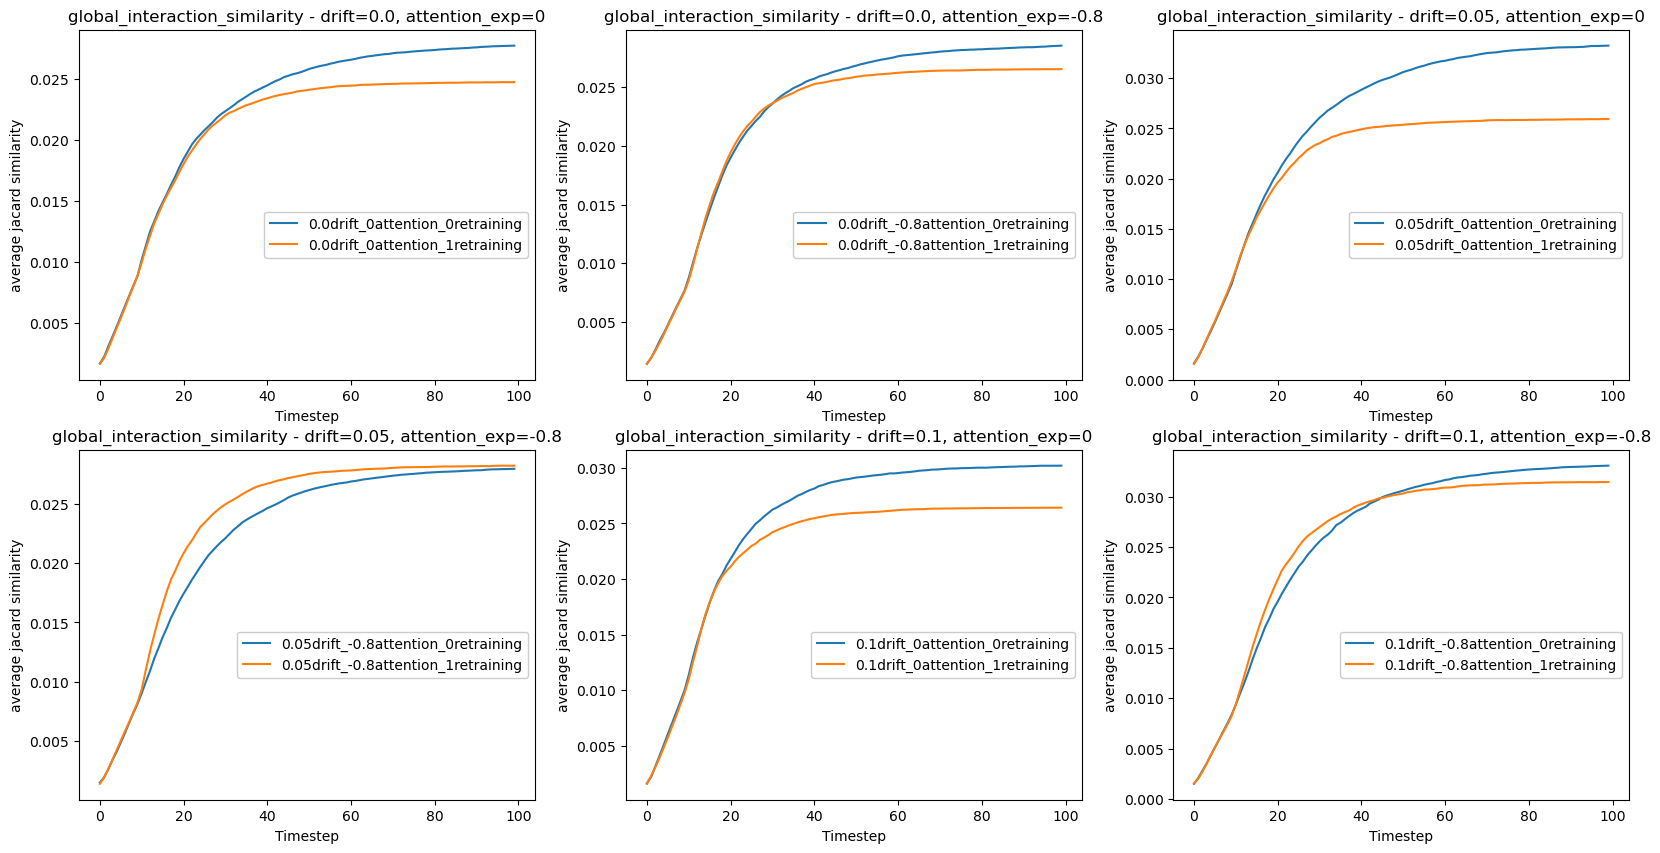

In [86]:
metric_key = "global_interaction_similarity"

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_metrics_by_axis(curr_ax, results, metric_key, model_key_pairs[i], id_to_readable, mult_sd=0)
    curr_ax.set_ylabel(y_labels[metric_key])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{metric_key} - drift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")

### Graphing **`Inter`** `-Cluster Interaction Similarity`

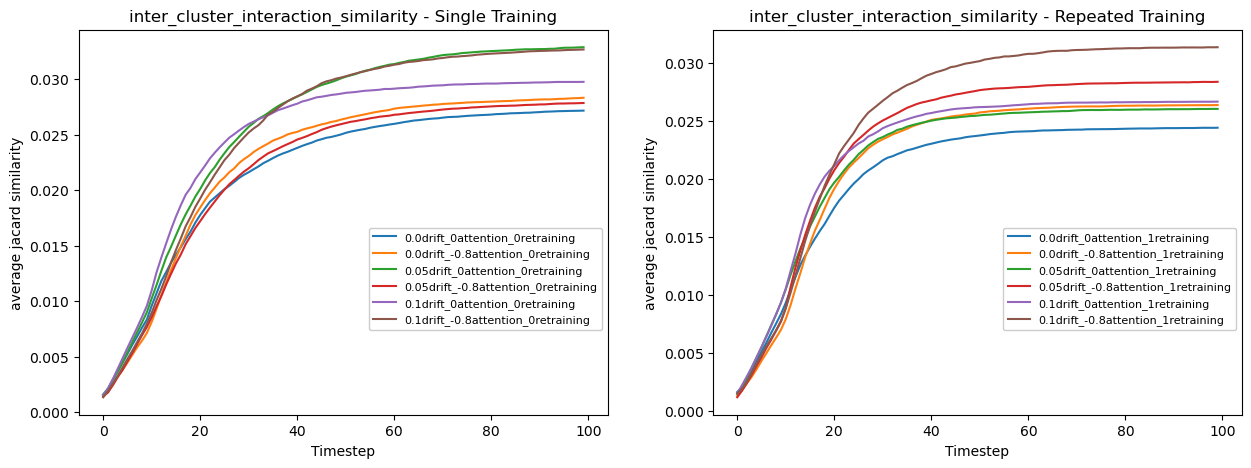

In [87]:
metric_key = "inter_cluster_interaction_similarity"

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

graph_metrics_by_axis(axs[0], results, metric_key, single_training_keys, id_to_readable, mult_sd=0)
axs[0].set_ylabel(y_labels[metric_key])
axs[0].set_xlabel("Timestep")
axs[0].set_title(f"{metric_key} - Single Training")
axs[0].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

graph_metrics_by_axis(axs[1], results, metric_key, repeated_training_keys, id_to_readable, mult_sd=0)
axs[1].set_ylabel(y_labels[metric_key])
axs[1].set_xlabel("Timestep")
axs[1].set_title(f"{metric_key} - Repeated Training")
axs[1].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

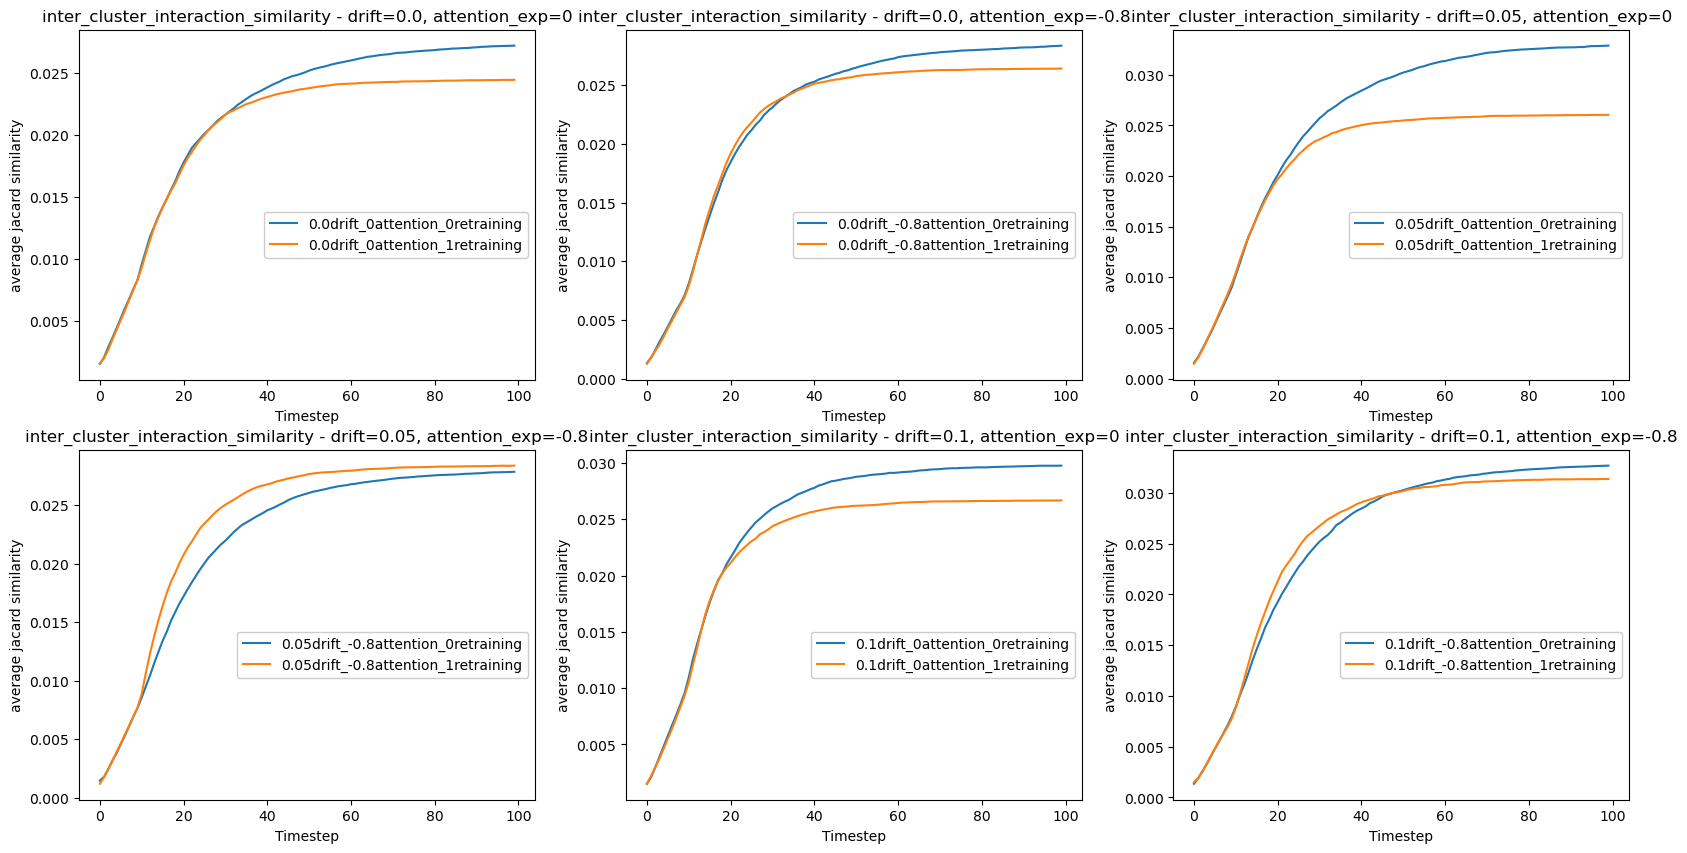

In [88]:
metric_key = "inter_cluster_interaction_similarity"

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_metrics_by_axis(curr_ax, results, metric_key, model_key_pairs[i], id_to_readable, mult_sd=0)
    curr_ax.set_ylabel(y_labels[metric_key])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{metric_key} - drift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")

### Graphing **`Intra`** `-Cluster Interaction Similarity`

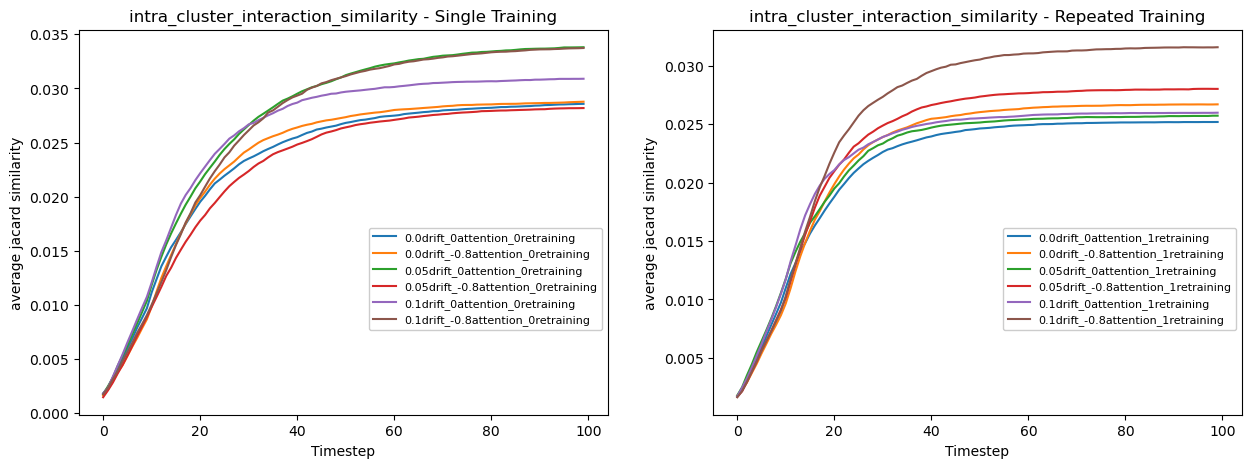

In [89]:
metric_key = "intra_cluster_interaction_similarity"

single_training_keys = [key[0] for key in model_key_pairs]
repeated_training_keys = [key[1] for key in model_key_pairs]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

graph_metrics_by_axis(axs[0], results, metric_key, single_training_keys, id_to_readable, mult_sd=0)
axs[0].set_ylabel(y_labels[metric_key])
axs[0].set_xlabel("Timestep")
axs[0].set_title(f"{metric_key} - Single Training")
axs[0].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

graph_metrics_by_axis(axs[1], results, metric_key, repeated_training_keys, id_to_readable, mult_sd=0)
axs[1].set_ylabel(y_labels[metric_key])
axs[1].set_xlabel("Timestep")
axs[1].set_title(f"{metric_key} - Repeated Training")
axs[1].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

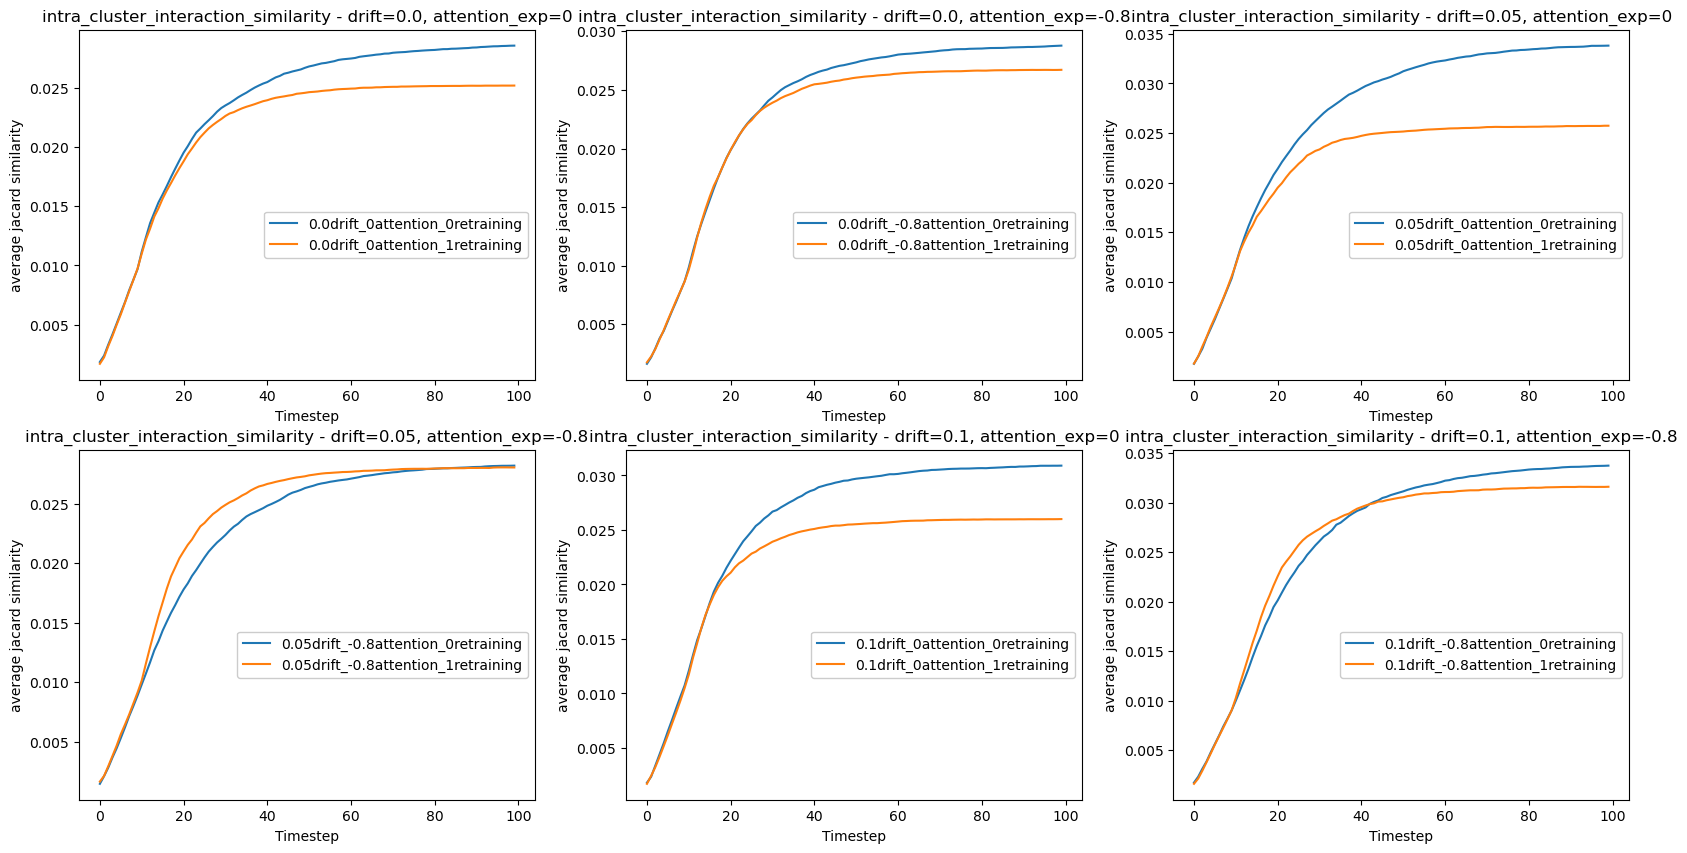

In [90]:
metric_key = "intra_cluster_interaction_similarity"

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_metrics_by_axis(curr_ax, results, metric_key, model_key_pairs[i], id_to_readable, mult_sd=0)
    curr_ax.set_ylabel(y_labels[metric_key])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{metric_key} - drift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")

### Graphing **`Intra`** `-Cluster Interaction Similarity` and **`Inter`** `-Cluster Interaction Similarity` relative to `Global Interaction Simarilty`

In [91]:
global_metric_key = "global_interaction_similarity"

#### Graphing **`Inter`** `-Cluster Interaction Similarity` relative to `Global Interaction Simarilty`
**Single training vs. Retraining**

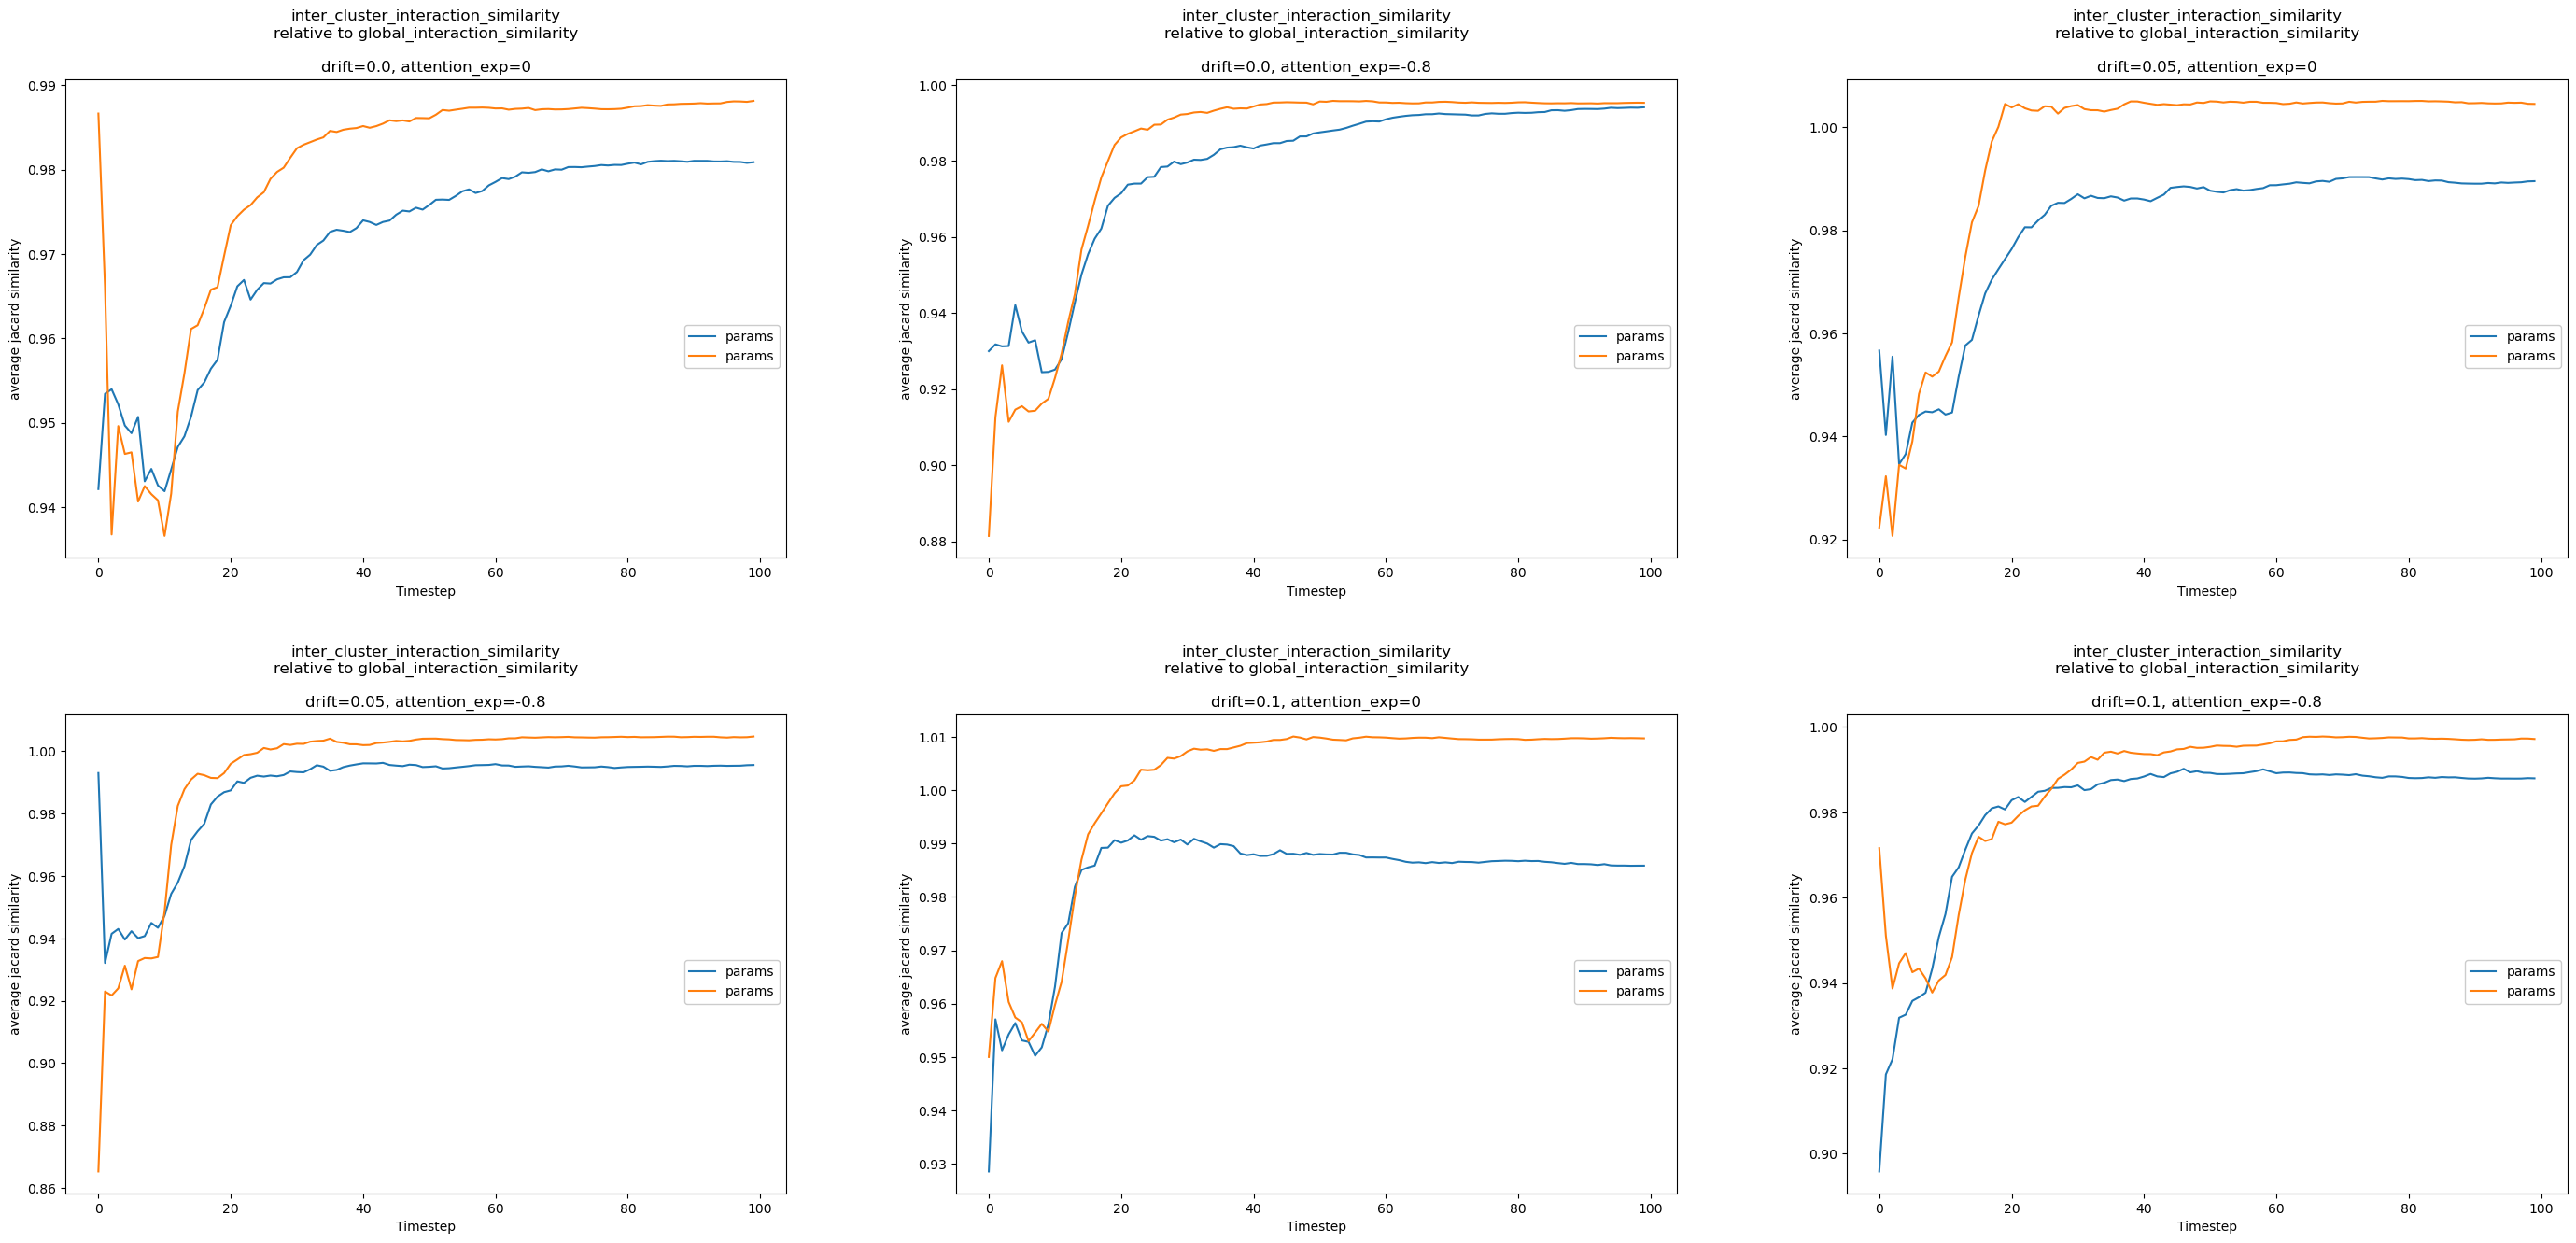

In [92]:
metric_key = "inter_cluster_interaction_similarity"

fig, axs = plt.subplots(2, 3, figsize=(30, 15))
fig.tight_layout(pad=10.0)

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_relative_to_global_by_axis(curr_ax, results, global_metric_key, metric_key, model_key_pairs[i], id_to_readable, mult_sd=0)
    curr_ax.set_ylabel(y_labels[metric_key])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{metric_key}\nrelative to {global_metric_key}\n\ndrift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")

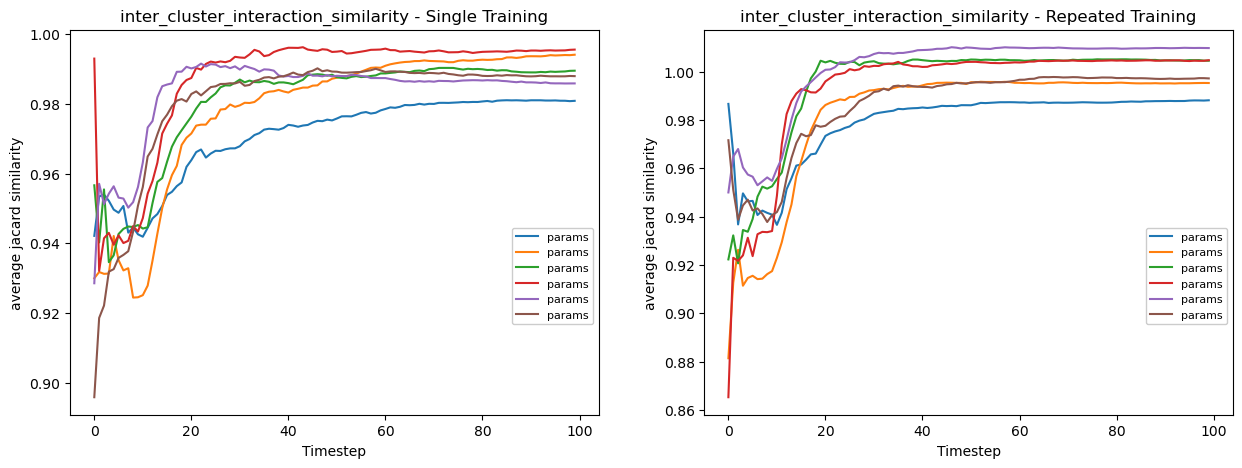

In [93]:
metric_key = "inter_cluster_interaction_similarity"

single_training_keys = [key[0] for key in model_key_pairs]
repeated_training_keys = [key[1] for key in model_key_pairs]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

graph_relative_to_global_by_axis(axs[0], results, global_metric_key, metric_key, single_training_keys, id_to_readable, mult_sd=0)
axs[0].set_ylabel(y_labels[metric_key])
axs[0].set_xlabel("Timestep")
axs[0].set_title(f"{metric_key} - Single Training")
axs[0].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

graph_relative_to_global_by_axis(axs[1], results, global_metric_key, metric_key, repeated_training_keys, id_to_readable, mult_sd=0)
axs[1].set_ylabel(y_labels[metric_key])
axs[1].set_xlabel("Timestep")
axs[1].set_title(f"{metric_key} - Repeated Training")
axs[1].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

#### Graphing **`Intra`** `-Cluster Interaction Similarity` relative to `Global Interaction Simarilty`
**Single training vs. Retraining**

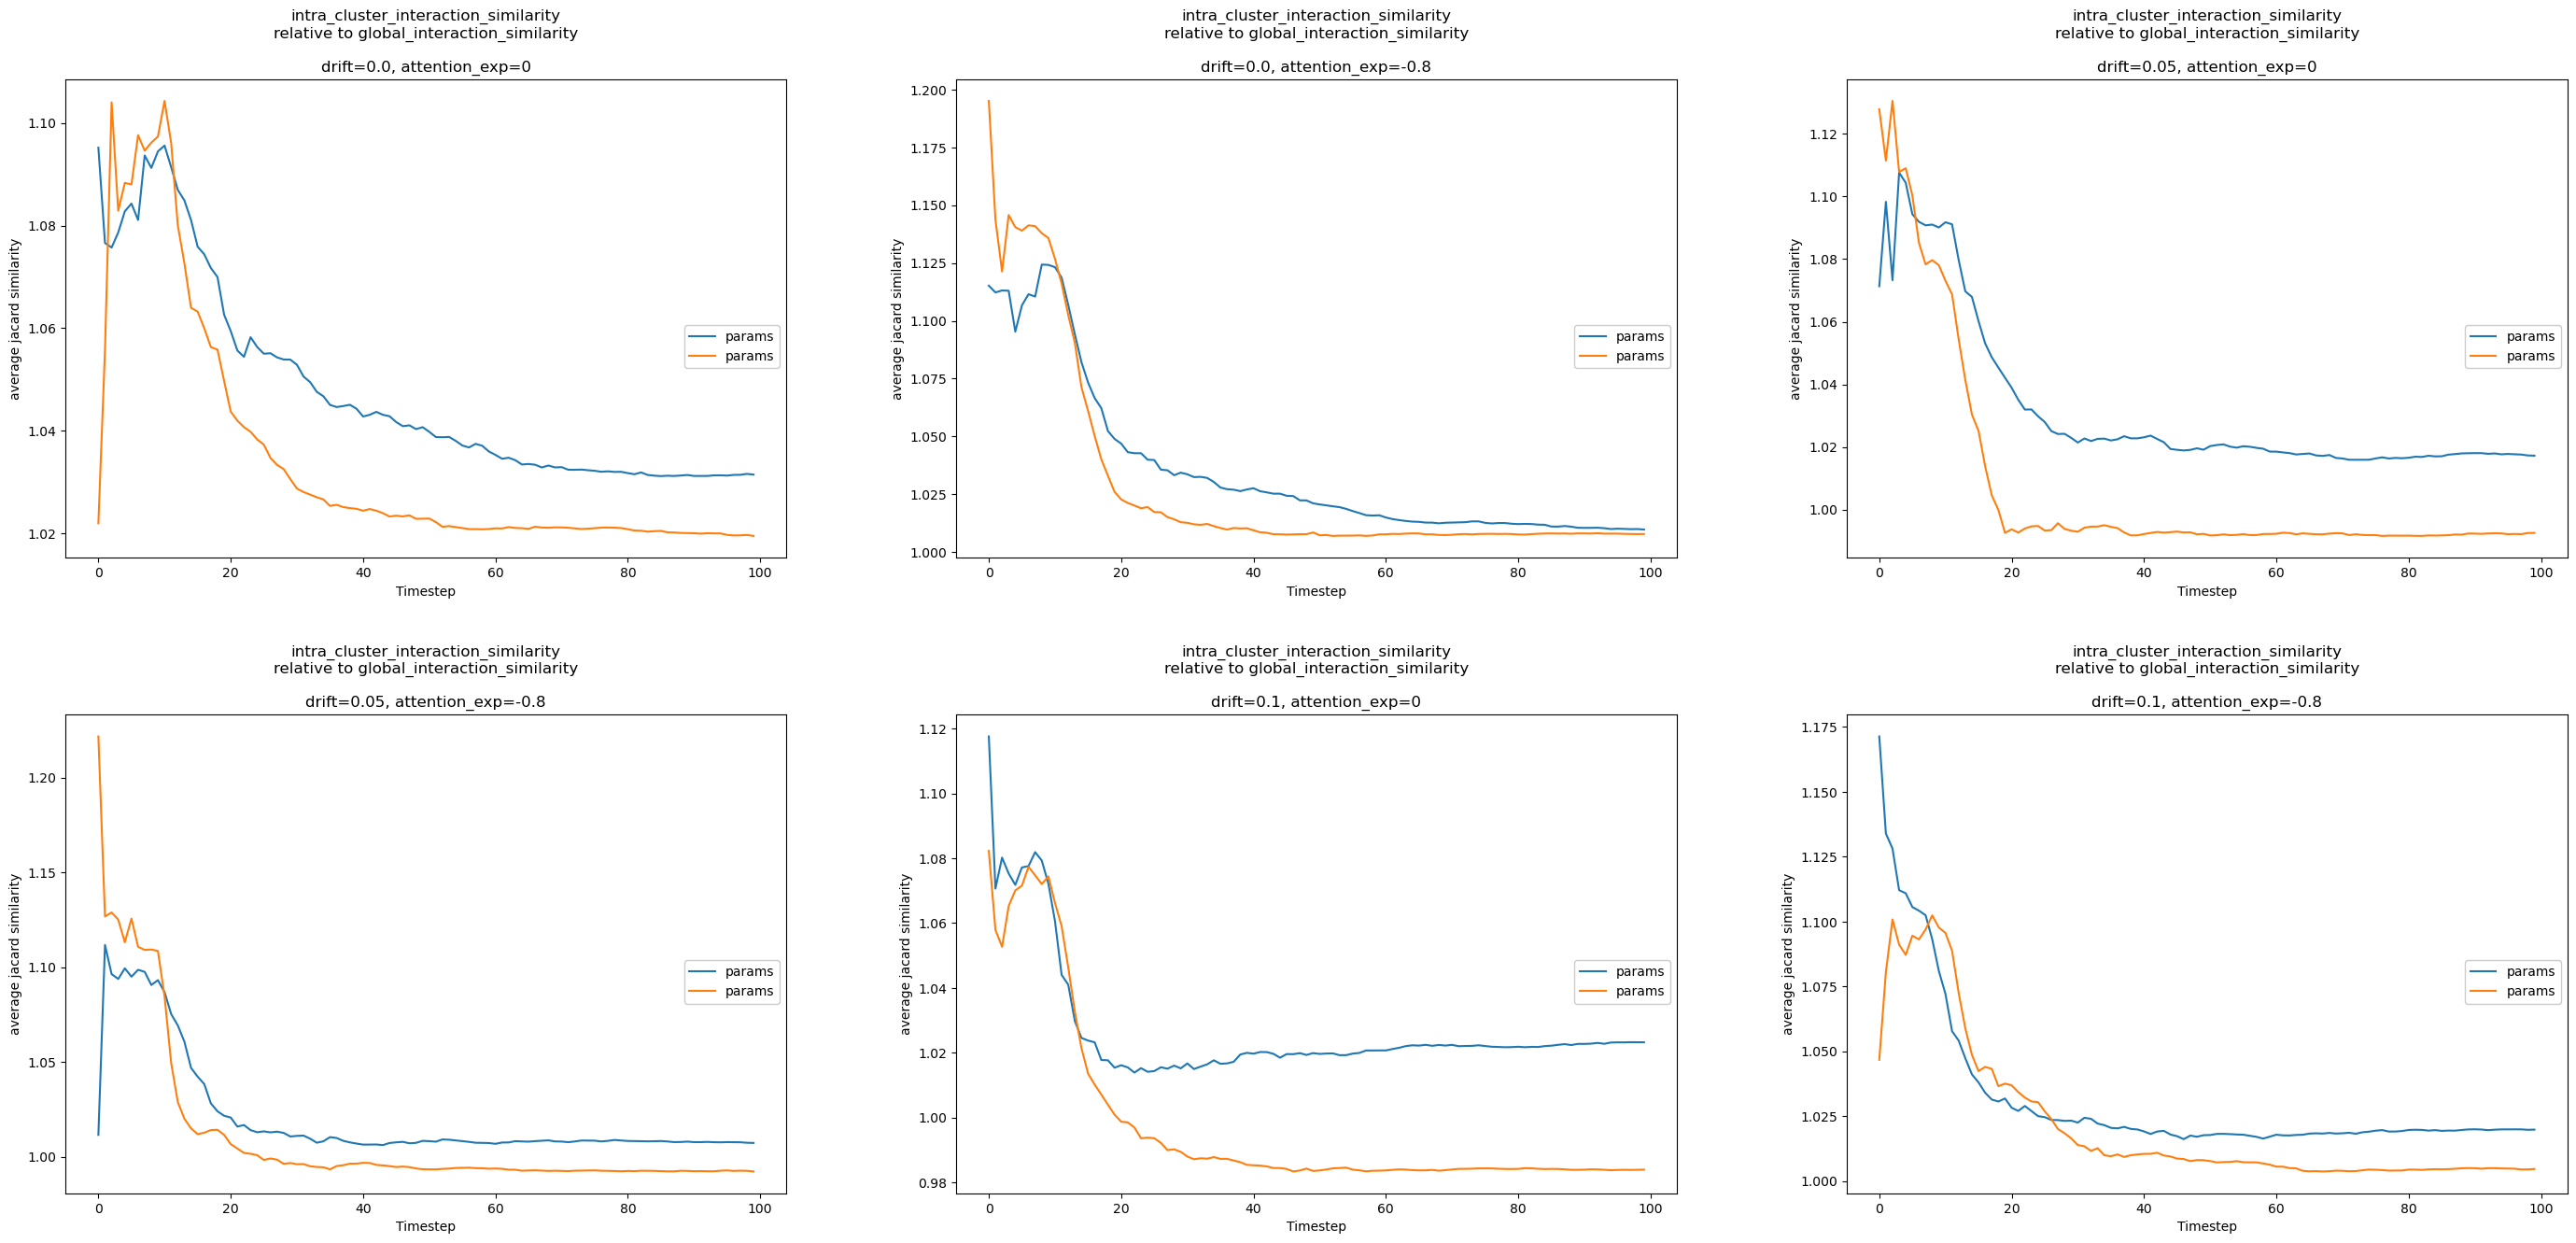

In [94]:
metric_key = "intra_cluster_interaction_similarity"

fig, axs = plt.subplots(2, 3, figsize=(30, 15))
fig.tight_layout(pad=10.0)

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_relative_to_global_by_axis(curr_ax, results, global_metric_key, metric_key, model_key_pairs[i], id_to_readable, mult_sd=0)
    curr_ax.set_ylabel(y_labels[metric_key])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{metric_key}\nrelative to {global_metric_key}\n\ndrift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")
    # curr_ax.set_xlim(40, 100)

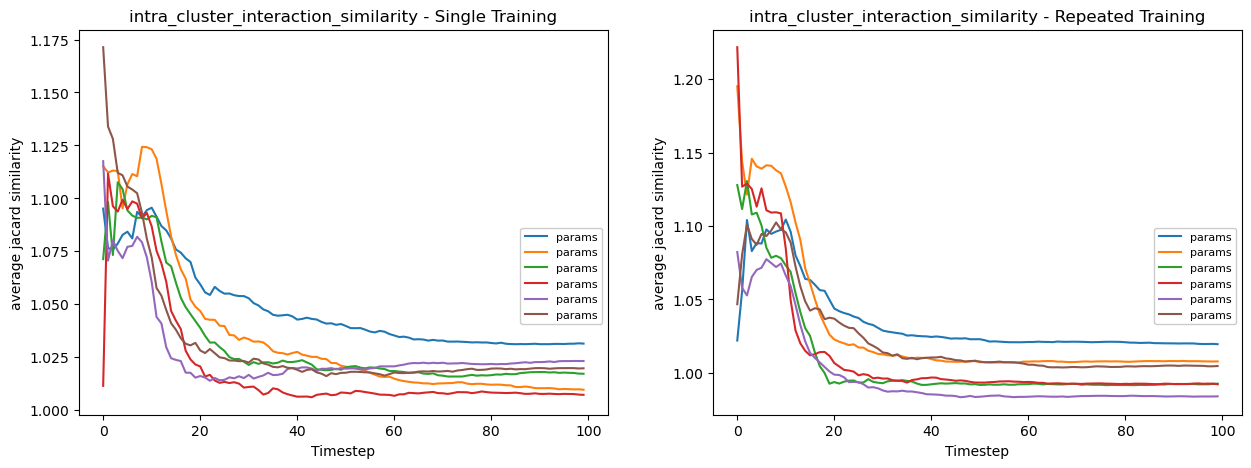

In [95]:
metric_key = "intra_cluster_interaction_similarity"

single_training_keys = [key[0] for key in model_key_pairs]
repeated_training_keys = [key[1] for key in model_key_pairs]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

graph_relative_to_global_by_axis(axs[0], results, global_metric_key, metric_key, single_training_keys, id_to_readable, mult_sd=0)
axs[0].set_ylabel(y_labels[metric_key])
axs[0].set_xlabel("Timestep")
axs[0].set_title(f"{metric_key} - Single Training")
axs[0].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

graph_relative_to_global_by_axis(axs[1], results, global_metric_key, metric_key, repeated_training_keys, id_to_readable, mult_sd=0)
axs[1].set_ylabel(y_labels[metric_key])
axs[1].set_xlabel("Timestep")
axs[1].set_title(f"{metric_key} - Repeated Training")
axs[1].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

#### Graphing **`Cluster Interaction Similarity`** relative to `Global Interaction Simarilty`

**Inter- vs. Intra-**

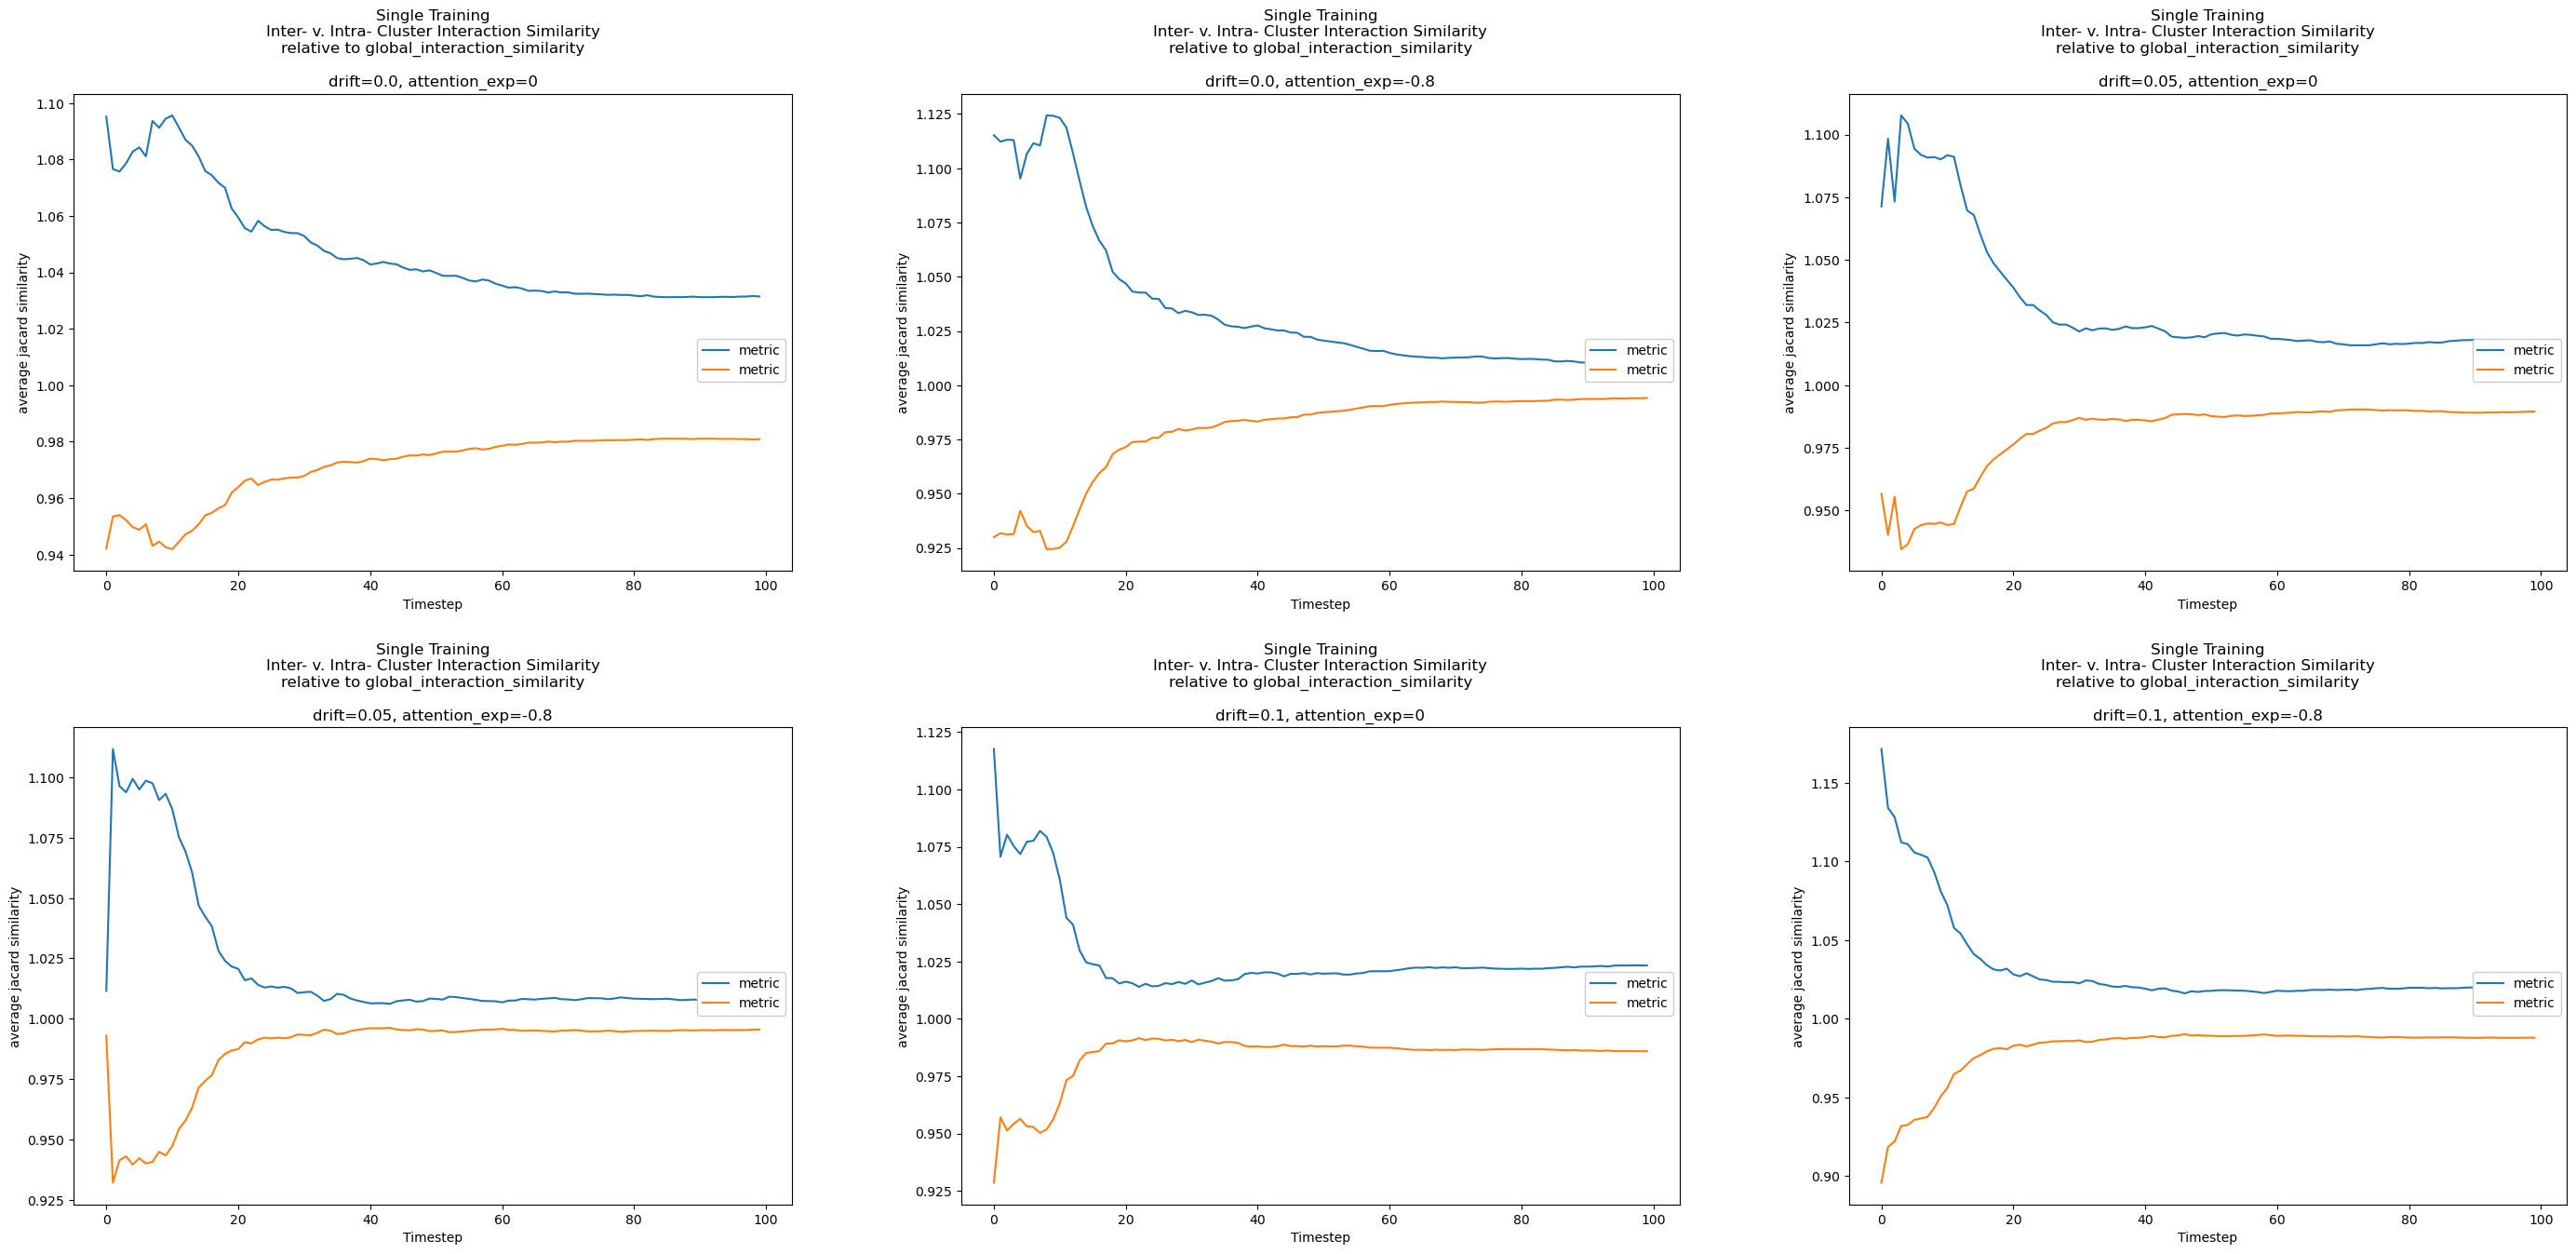

In [96]:
"""
Single training
"""
metric_keys = ["intra_cluster_interaction_similarity", "inter_cluster_interaction_similarity"]

fig, axs = plt.subplots(2, 3, figsize=(30, 15))
fig.tight_layout(pad=10.0)

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_relative_to_global_by_axis(curr_ax, results, global_metric_key, metric_keys[0], (model_key_pairs[i][0],), id_to_readable, mult_sd=0, graph_by="metric")
    graph_relative_to_global_by_axis(curr_ax, results, global_metric_key, metric_keys[1], (model_key_pairs[i][0],), id_to_readable, mult_sd=0, graph_by="metric")
    curr_ax.set_ylabel(y_labels[metric_keys[0]])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"Single Training\nInter- v. Intra- Cluster Interaction Similarity\nrelative to {global_metric_key}\n\ndrift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")
    # curr_ax.set_xlim(40, 100)

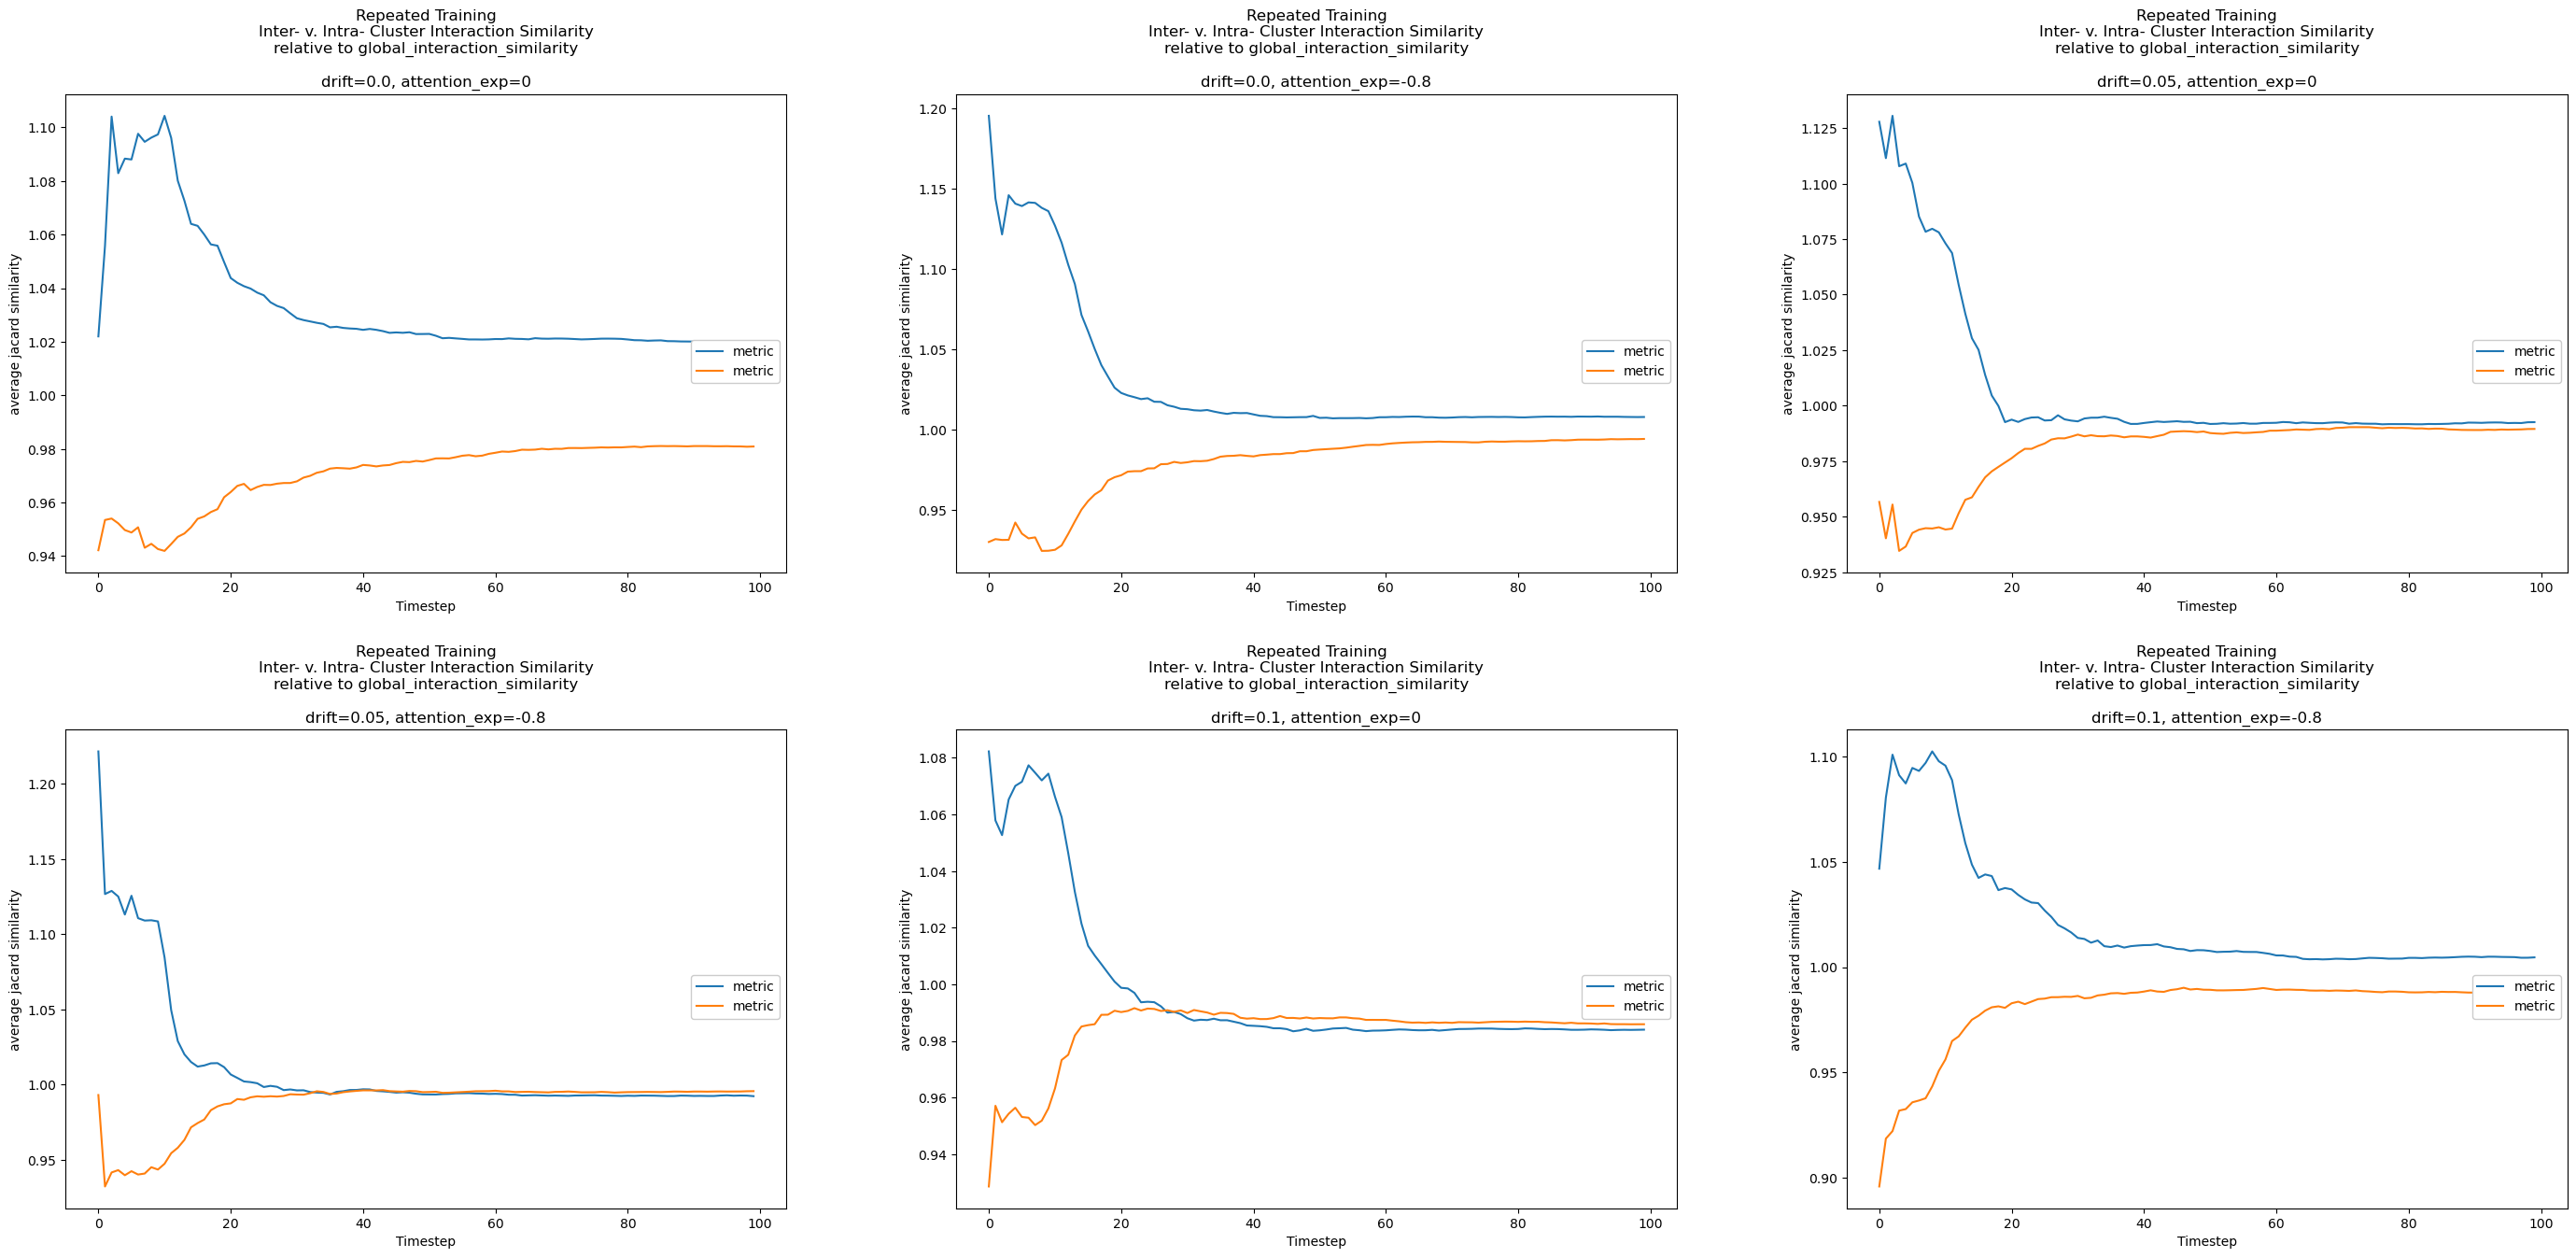

In [97]:
"""
Repeated training
"""
metric_keys = ["intra_cluster_interaction_similarity", "inter_cluster_interaction_similarity"]

fig, axs = plt.subplots(2, 3, figsize=(30, 15))
fig.tight_layout(pad=10.0)

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_relative_to_global_by_axis(curr_ax, results, global_metric_key, metric_keys[0], (model_key_pairs[i][1],), id_to_readable, mult_sd=0, graph_by="metric")
    graph_relative_to_global_by_axis(curr_ax, results, global_metric_key, metric_keys[1], (model_key_pairs[i][0],), id_to_readable, mult_sd=0, graph_by="metric")
    curr_ax.set_ylabel(y_labels[metric_keys[0]])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"Repeated Training\nInter- v. Intra- Cluster Interaction Similarity\nrelative to {global_metric_key}\n\ndrift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")
    # curr_ax.set_xlim(40, 100)

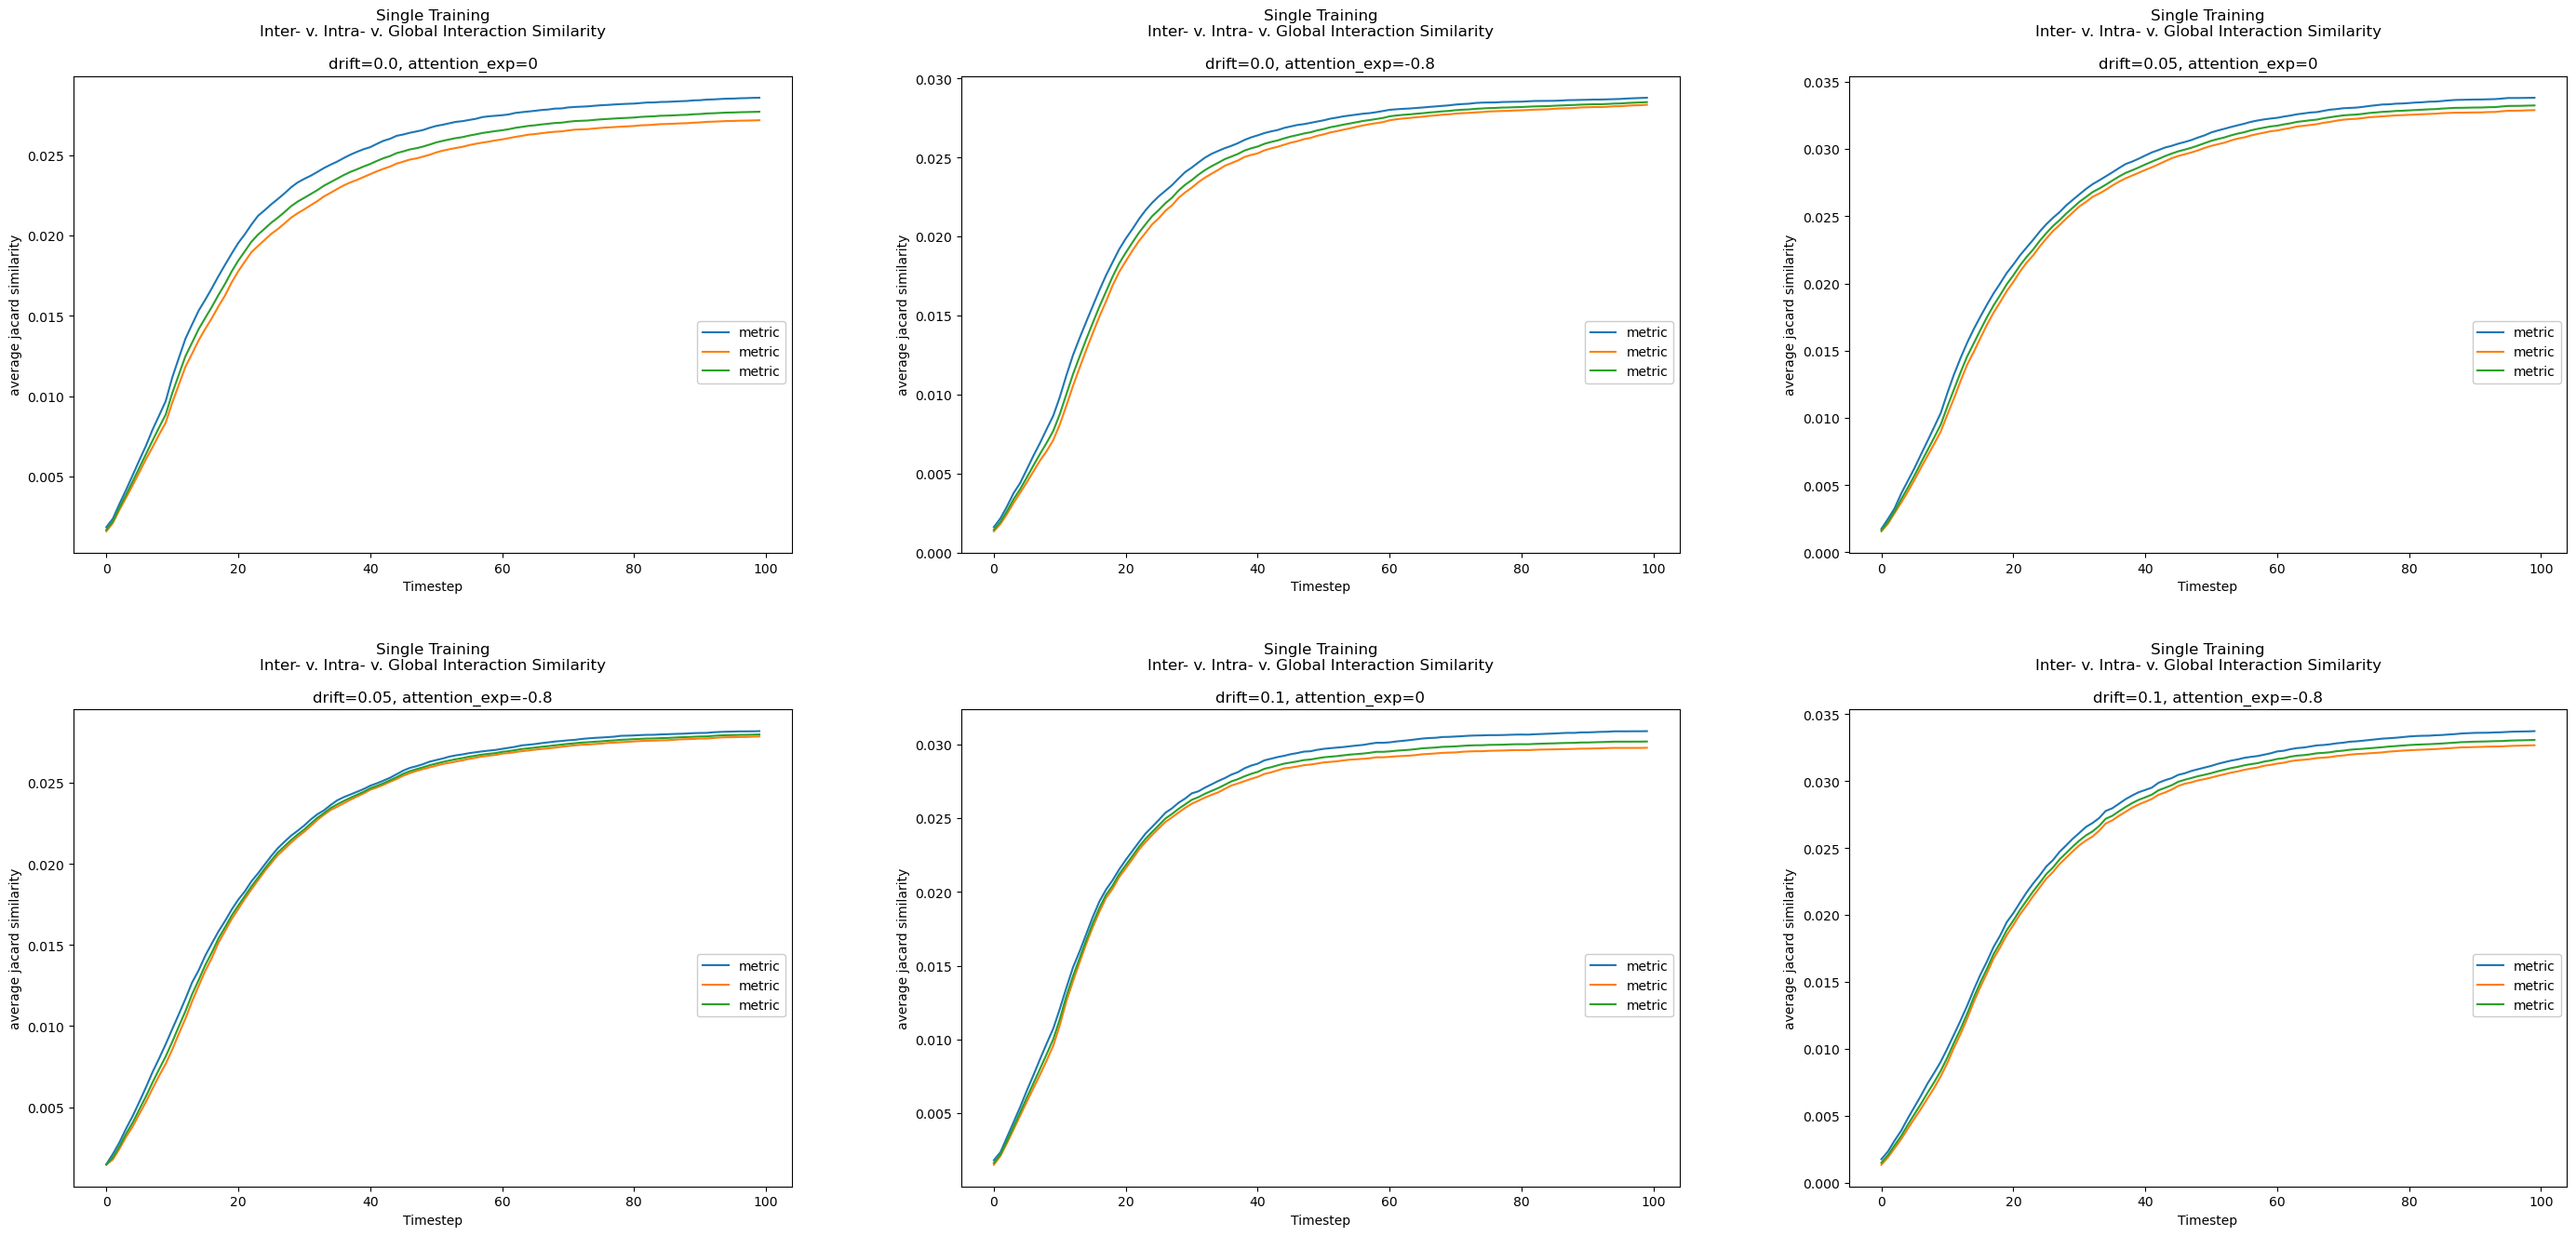

In [98]:
"""
Single training
"""
metric_keys = ["intra_cluster_interaction_similarity", "inter_cluster_interaction_similarity", "global_interaction_similarity"]

fig, axs = plt.subplots(2, 3, figsize=(30, 15))
fig.tight_layout(pad=10.0)

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_metrics_by_axis(curr_ax, results, metric_keys[0], (model_key_pairs[i][0],), id_to_readable, mult_sd=0, label="metric")
    graph_metrics_by_axis(curr_ax, results, metric_keys[1], (model_key_pairs[i][0],), id_to_readable, mult_sd=0, label="metric")
    graph_metrics_by_axis(curr_ax, results, metric_keys[2], (model_key_pairs[i][0],), id_to_readable, mult_sd=0, label="metric")
    curr_ax.set_ylabel(y_labels[metric_keys[0]])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"Single Training\nInter- v. Intra- v. Global Interaction Similarity\n\ndrift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")

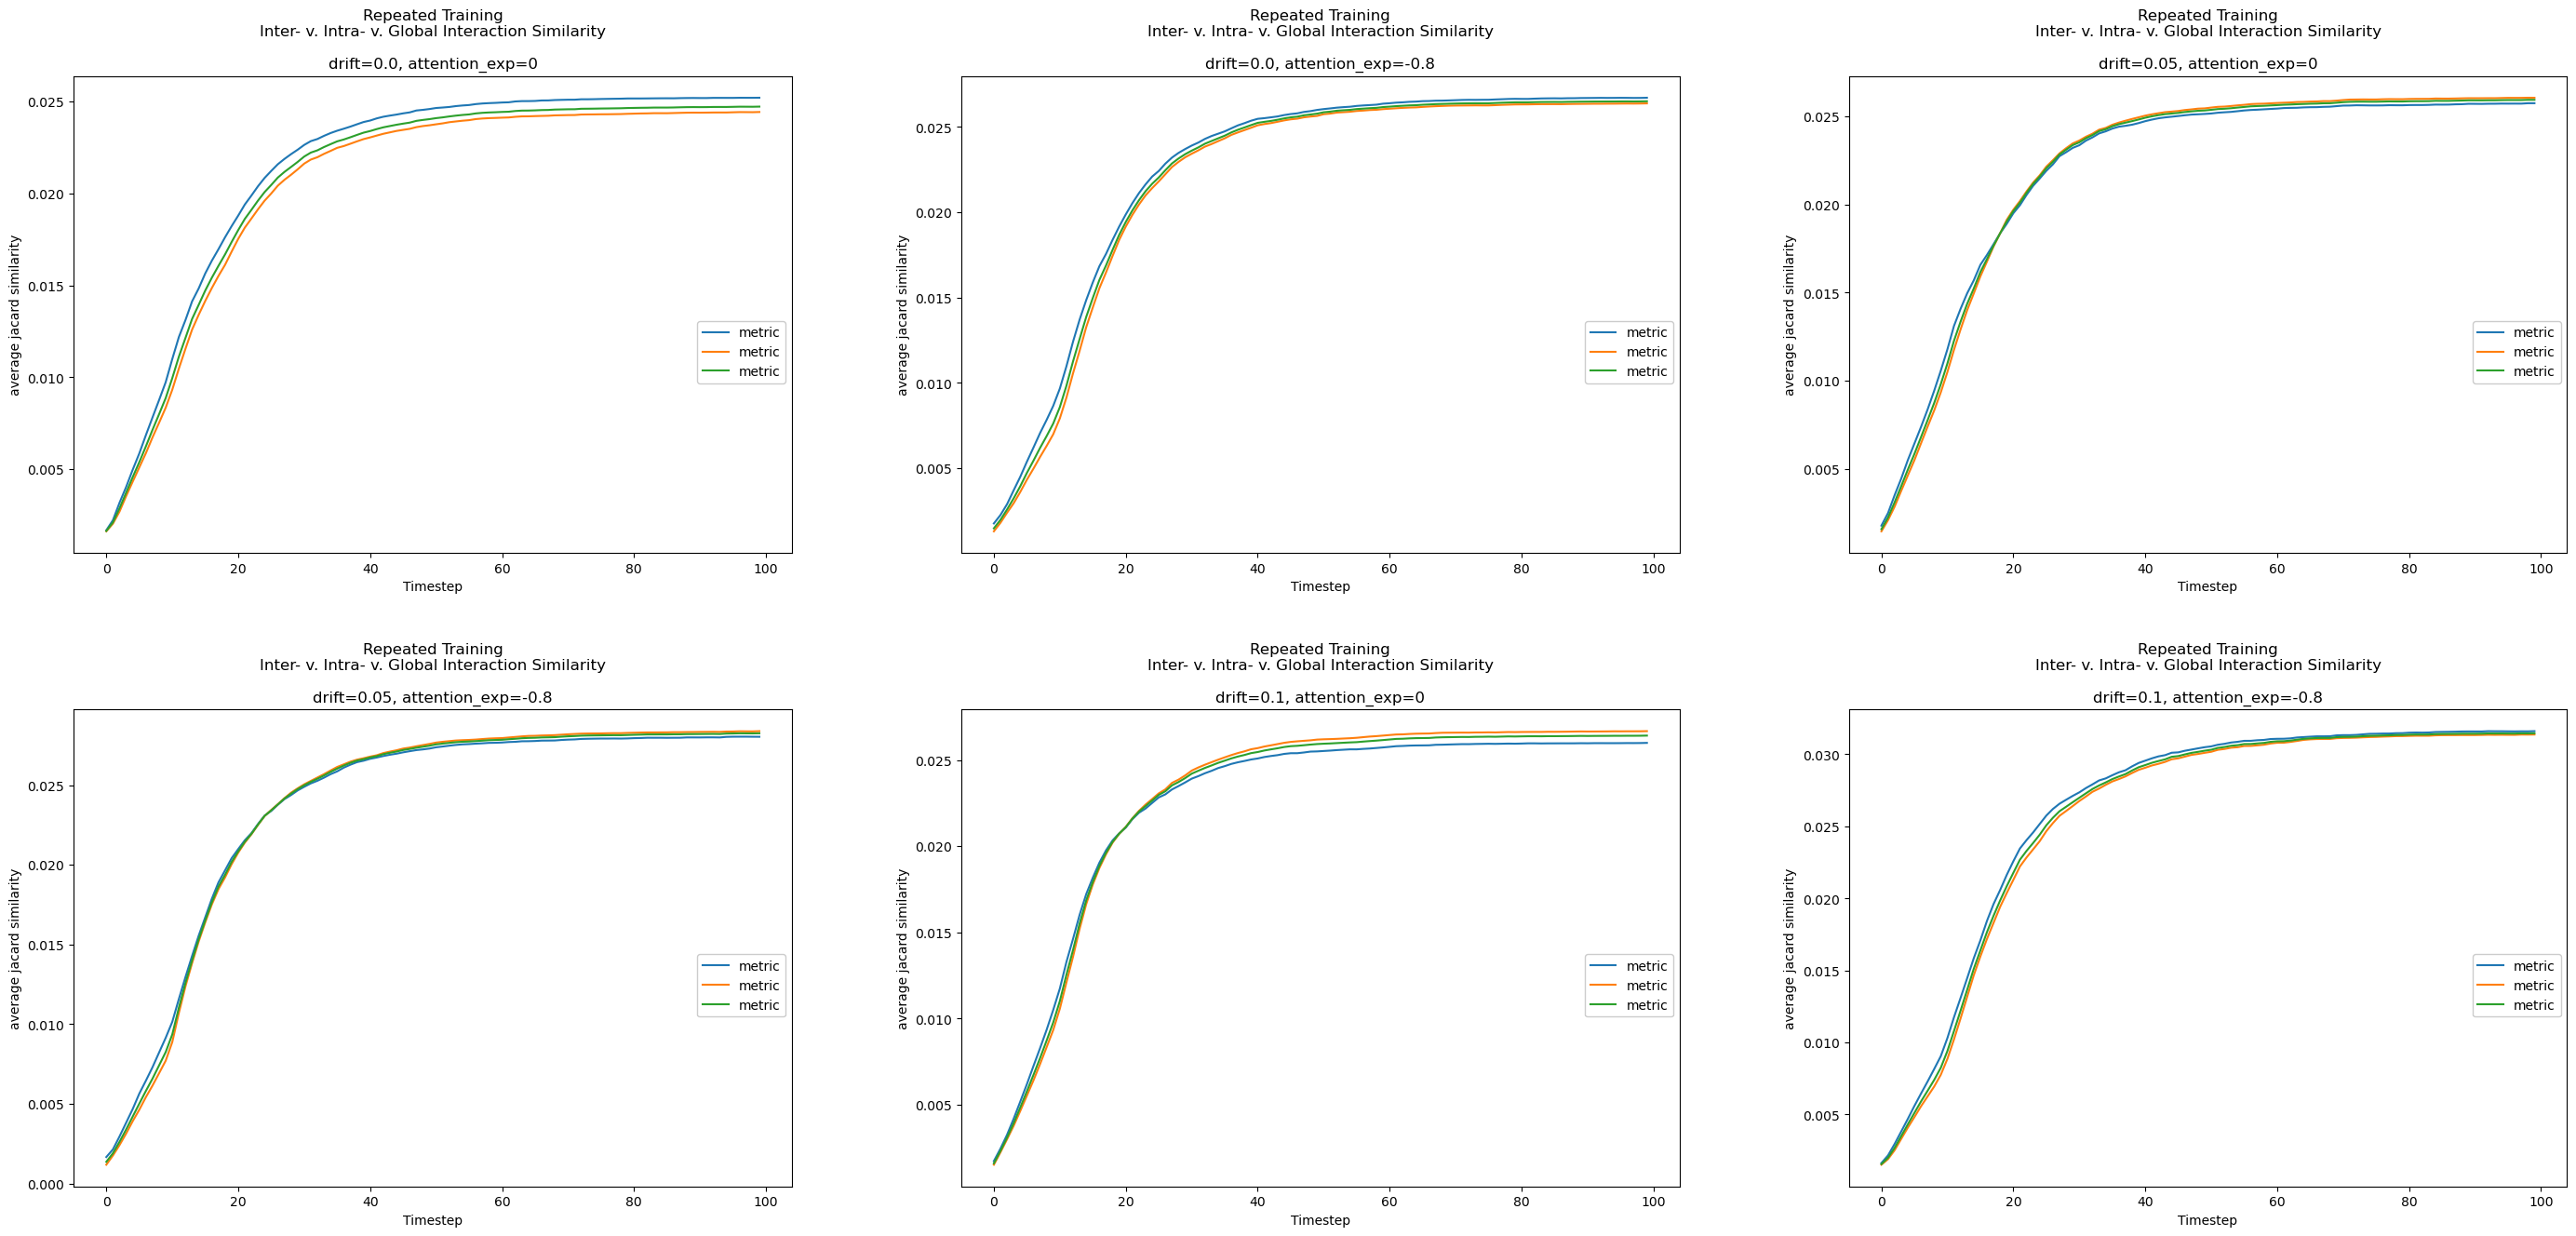

In [99]:
"""
Repeated training
"""
metric_keys = ["intra_cluster_interaction_similarity", "inter_cluster_interaction_similarity", "global_interaction_similarity"]

fig, axs = plt.subplots(2, 3, figsize=(30, 15))
fig.tight_layout(pad=10.0)

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_metrics_by_axis(curr_ax, results, metric_keys[0], (model_key_pairs[i][1],), id_to_readable, mult_sd=0, label="metric")
    graph_metrics_by_axis(curr_ax, results, metric_keys[1], (model_key_pairs[i][1],), id_to_readable, mult_sd=0, label="metric")
    graph_metrics_by_axis(curr_ax, results, metric_keys[2], (model_key_pairs[i][1],), id_to_readable, mult_sd=0, label="metric")
    curr_ax.set_ylabel(y_labels[metric_keys[0]])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"Repeated Training\nInter- v. Intra- v. Global Interaction Similarity\n\ndrift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")

**Intra-Cluster:Inter-Cluster Interaction Similarity, Single training v. Repeated training**

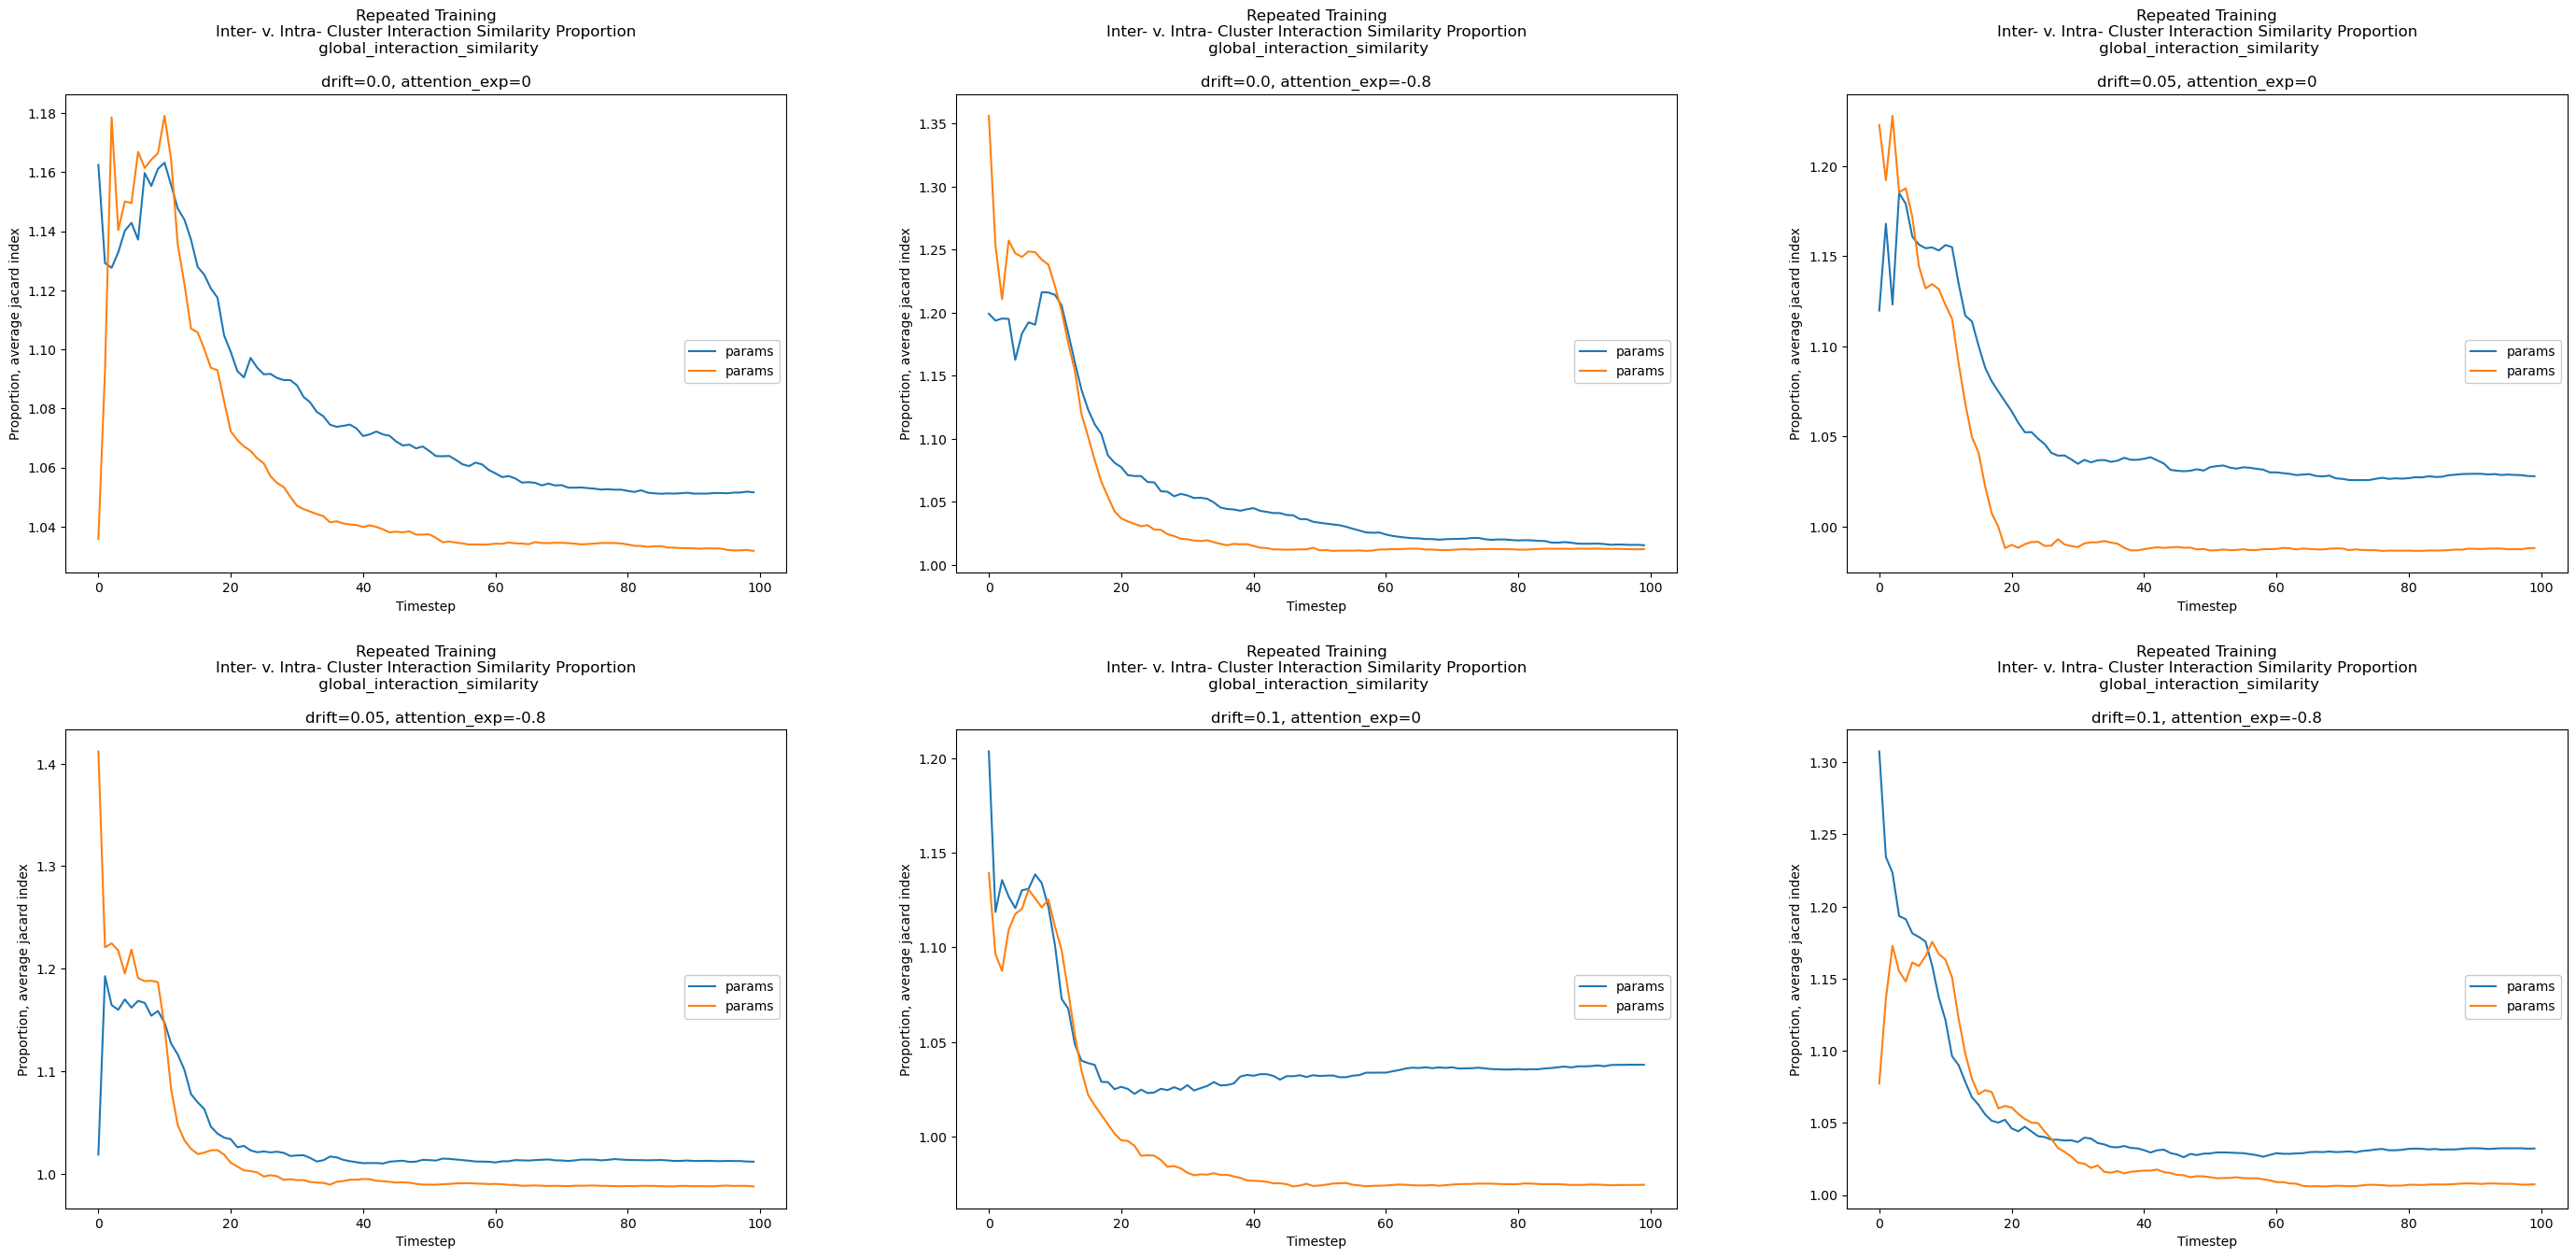

In [100]:
numerator = "intra_cluster_interaction_similarity"
denominator = "inter_cluster_interaction_similarity"

fig, axs = plt.subplots(2, 3, figsize=(30, 15))
fig.tight_layout(pad=10.0)

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_relative_to_global_by_axis(curr_ax, results, denominator, numerator, model_key_pairs[i], id_to_readable, mult_sd=0)
    curr_ax.set_ylabel("Proportion, average jacard index")
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"Repeated Training\nInter- v. Intra- Cluster Interaction Similarity Proportion\n {global_metric_key}\n\ndrift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")

# Graphing `Cosine Similarity`

### Graphing **`Intra`** `-Cluster Cosine Similarity`

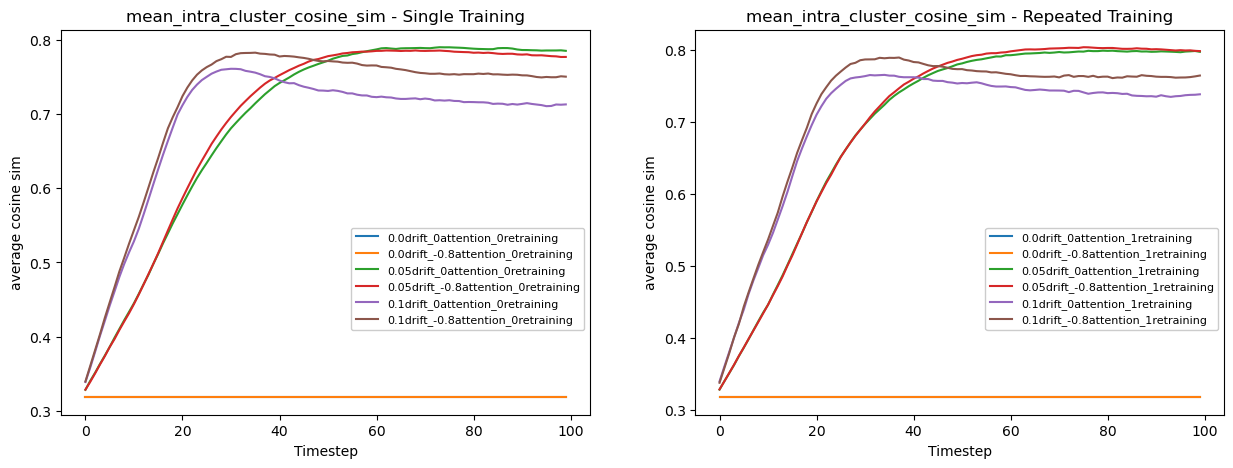

In [101]:
metric_key = "mean_intra_cluster_cosine_sim"

single_training_keys = [key[0] for key in model_key_pairs]
repeated_training_keys = [key[1] for key in model_key_pairs]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

graph_metrics_by_axis(axs[0], results, metric_key, single_training_keys, id_to_readable, mult_sd=0)
axs[0].set_ylabel(y_labels[metric_key])
axs[0].set_xlabel("Timestep")
axs[0].set_title(f"{metric_key} - Single Training")
axs[0].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

graph_metrics_by_axis(axs[1], results, metric_key, repeated_training_keys, id_to_readable, mult_sd=0)
axs[1].set_ylabel(y_labels[metric_key])
axs[1].set_xlabel("Timestep")
axs[1].set_title(f"{metric_key} - Repeated Training")
axs[1].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

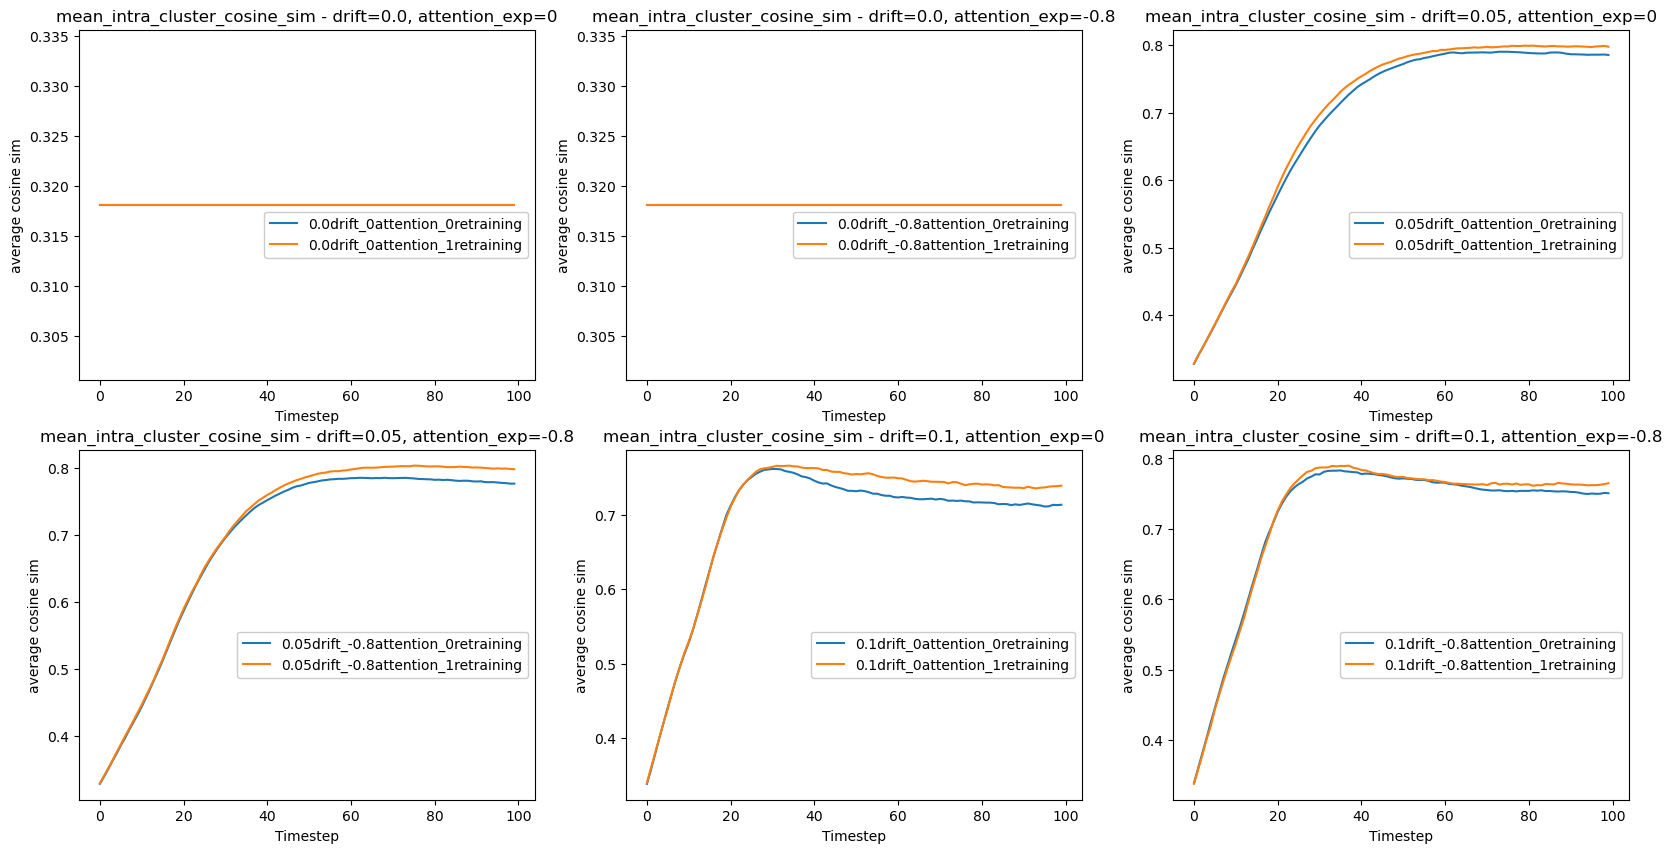

In [102]:
metric_key = "mean_intra_cluster_cosine_sim"

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_metrics_by_axis(curr_ax, results, metric_key, model_key_pairs[i], id_to_readable, mult_sd=0)
    curr_ax.set_ylabel(y_labels[metric_key])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{metric_key} - drift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")

### Graphing **`Inter`** `-Cluster Cosine Similarity`

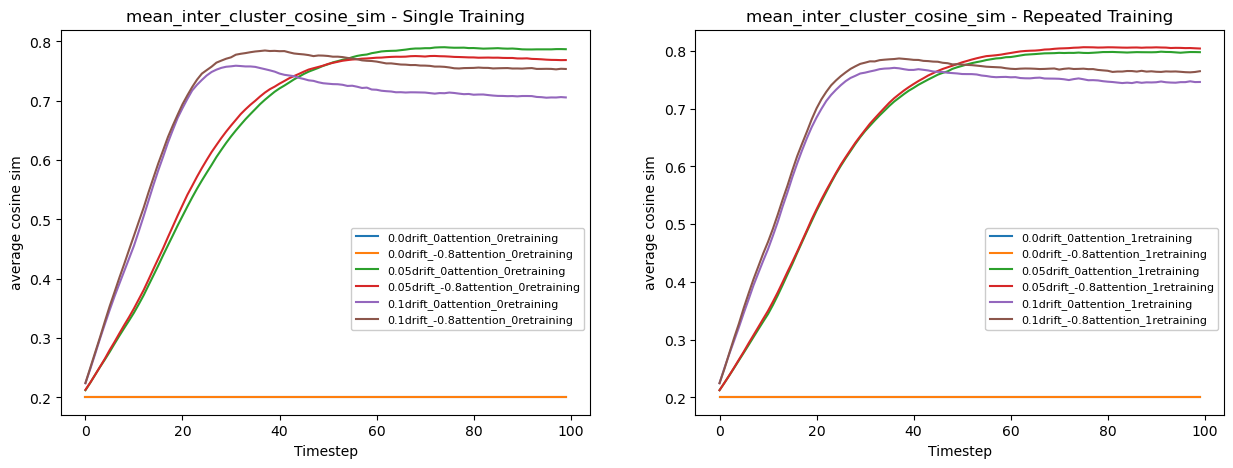

In [103]:
metric_key = "mean_inter_cluster_cosine_sim"

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

graph_metrics_by_axis(axs[0], results, metric_key, single_training_keys, id_to_readable, mult_sd=0)
axs[0].set_ylabel(y_labels[metric_key])
axs[0].set_xlabel("Timestep")
axs[0].set_title(f"{metric_key} - Single Training")
axs[0].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

graph_metrics_by_axis(axs[1], results, metric_key, repeated_training_keys, id_to_readable, mult_sd=0)
axs[1].set_ylabel(y_labels[metric_key])
axs[1].set_xlabel("Timestep")
axs[1].set_title(f"{metric_key} - Repeated Training")
axs[1].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

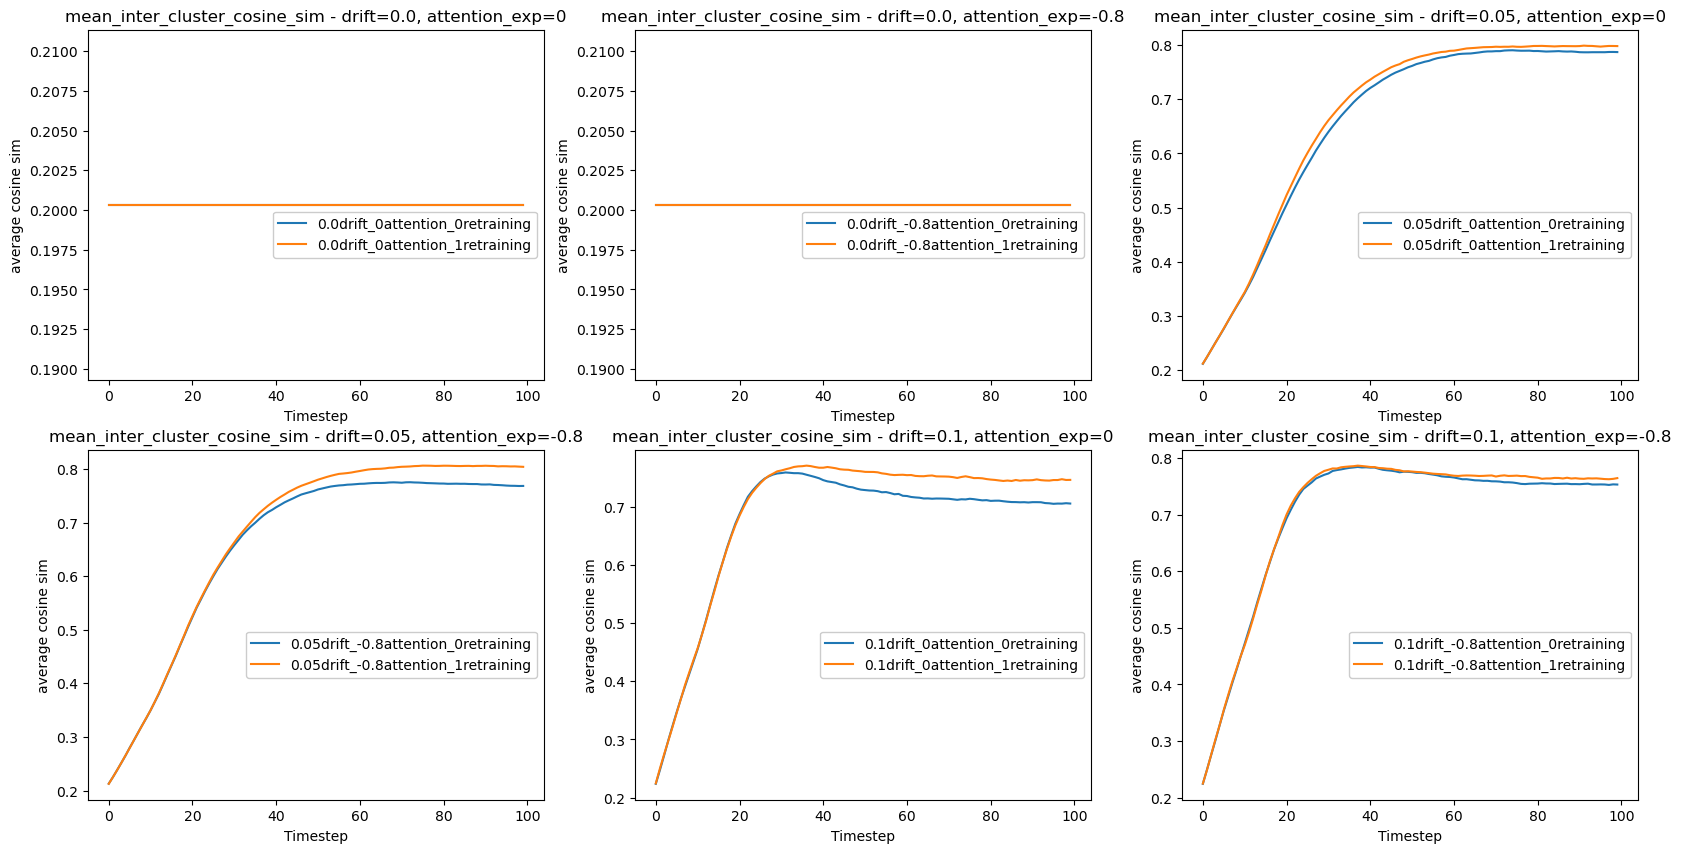

In [104]:
metric_key = "mean_inter_cluster_cosine_sim"

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_metrics_by_axis(curr_ax, results, metric_key, model_key_pairs[i], id_to_readable, mult_sd=0)
    curr_ax.set_ylabel(y_labels[metric_key])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{metric_key} - drift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")

#### Graphing **`Cluster Cosine Similarity`** relative to `Global Cosine Simarilty`

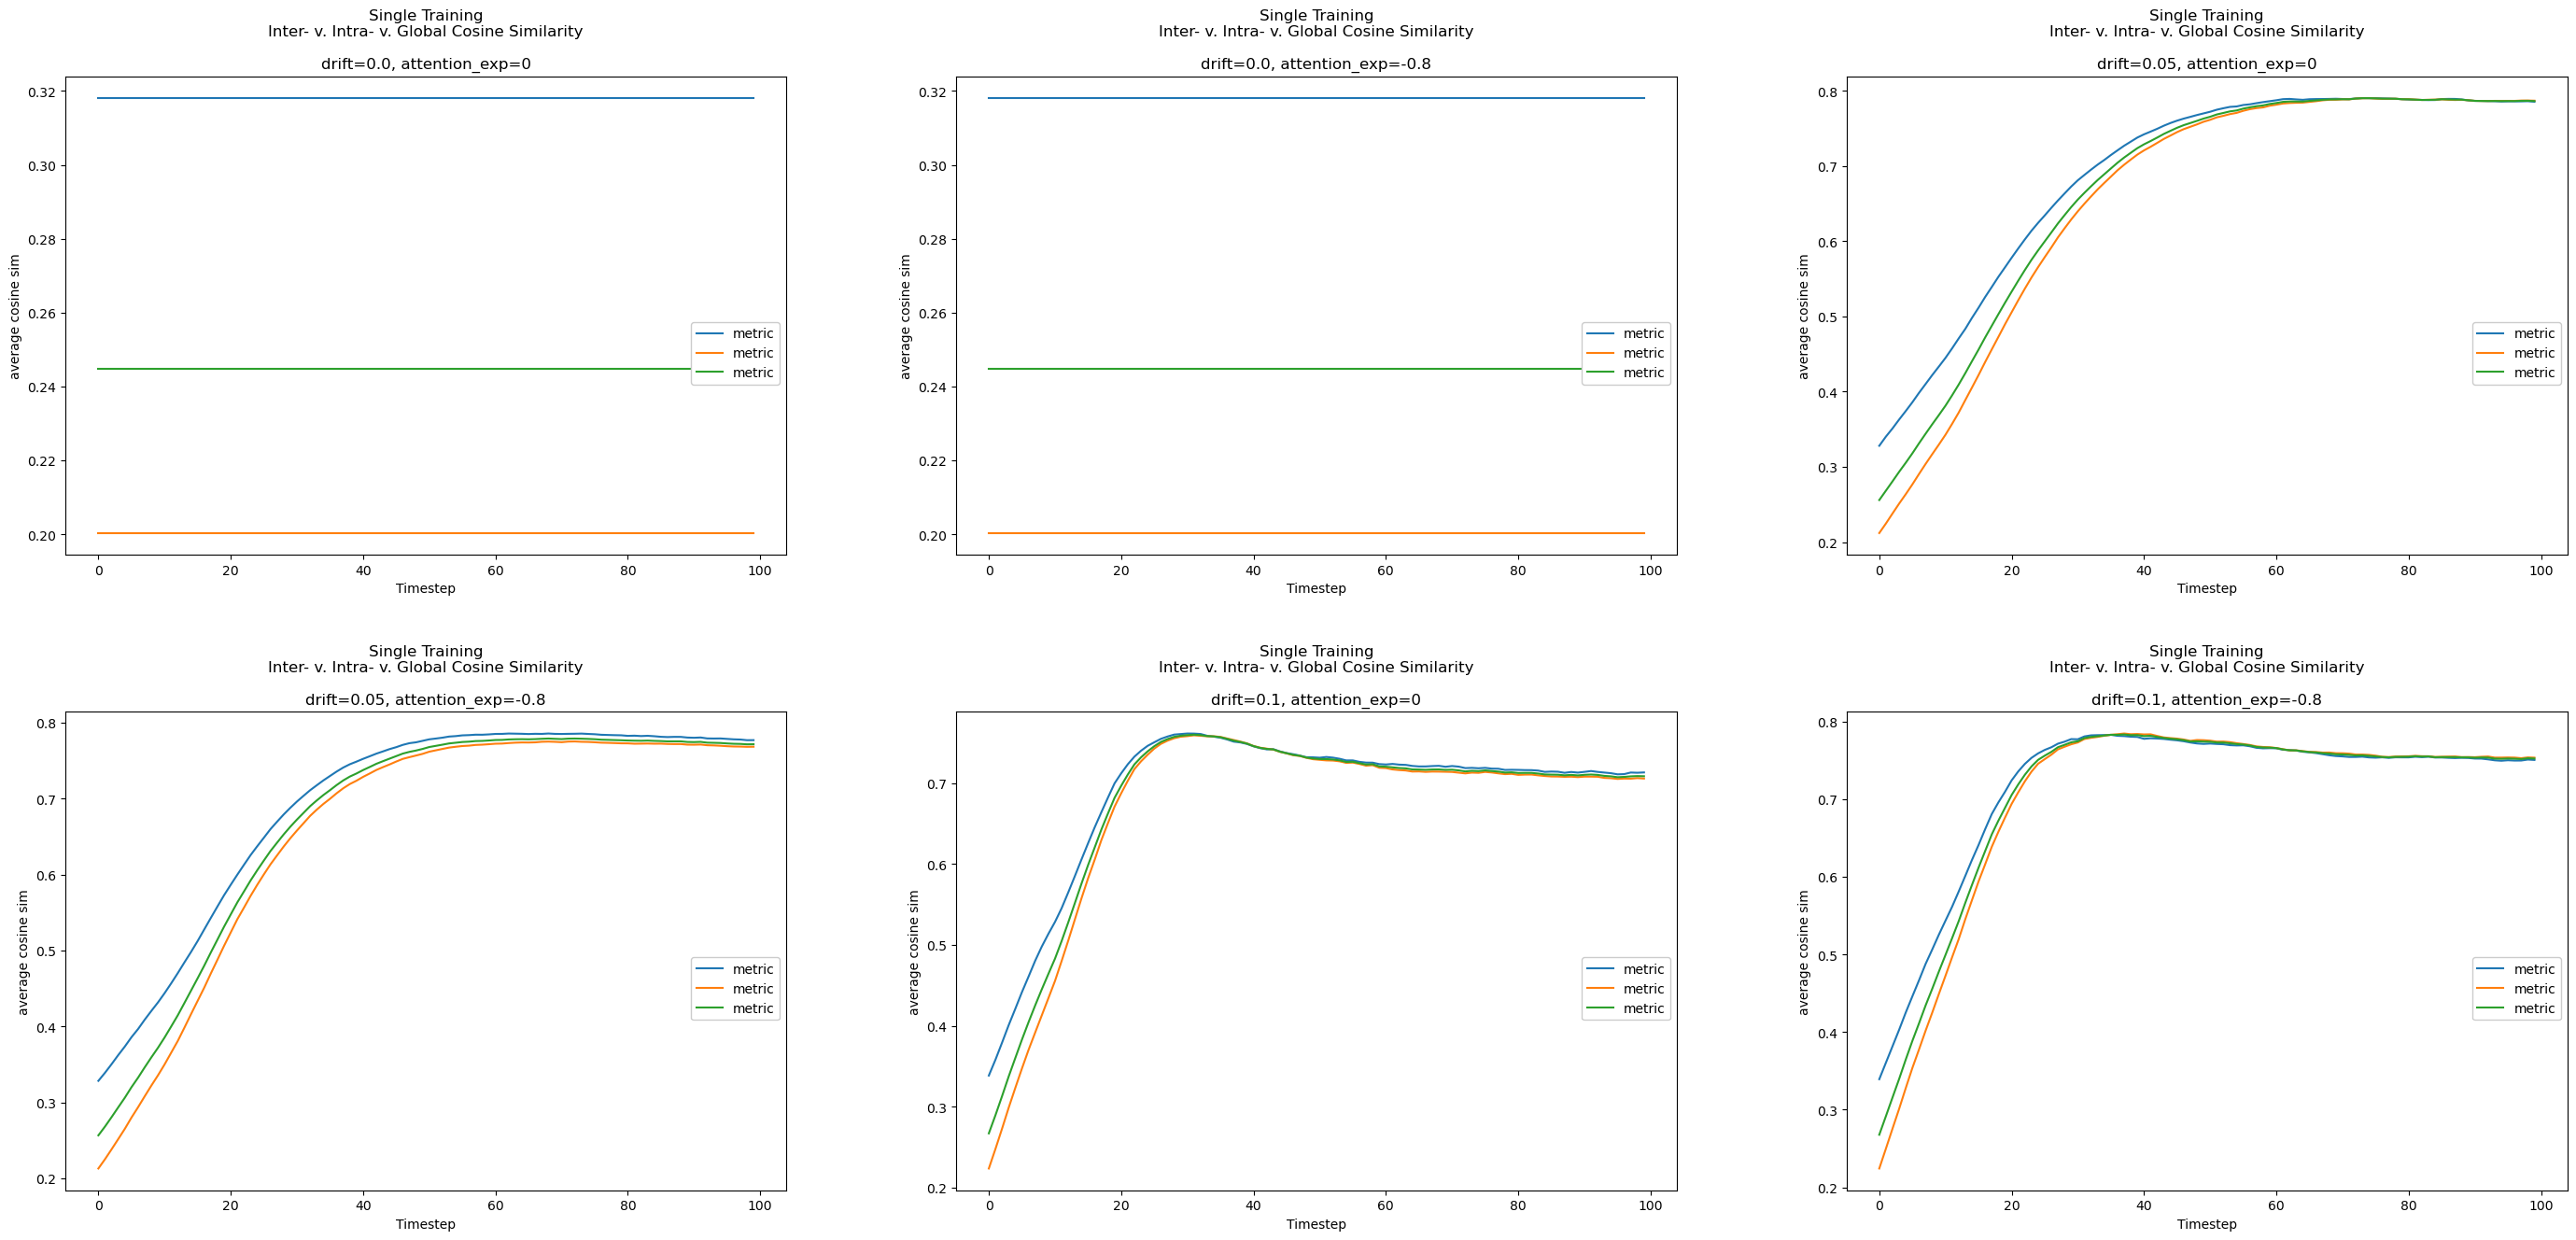

In [105]:
"""
Single training
"""
metric_keys = ["mean_intra_cluster_cosine_sim", "mean_inter_cluster_cosine_sim", "mean_global_cosine_sim"]

fig, axs = plt.subplots(2, 3, figsize=(30, 15))
fig.tight_layout(pad=10.0)

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_metrics_by_axis(curr_ax, results, metric_keys[0], (model_key_pairs[i][0],), id_to_readable, mult_sd=0, label="metric")
    graph_metrics_by_axis(curr_ax, results, metric_keys[1], (model_key_pairs[i][0],), id_to_readable, mult_sd=0, label="metric")
    graph_metrics_by_axis(curr_ax, results, metric_keys[2], (model_key_pairs[i][0],), id_to_readable, mult_sd=0, label="metric")
    
    # curr_ax.set_xlim(75, 100)
    # if i > 3:
    #     curr_ax.set_ylim(0.65, 0.75)
    # elif i > 1:
    #     curr_ax.set_ylim(0.7, 0.8)
    curr_ax.set_ylabel(y_labels[metric_keys[0]])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"Single Training\nInter- v. Intra- v. Global Cosine Similarity\n\ndrift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")


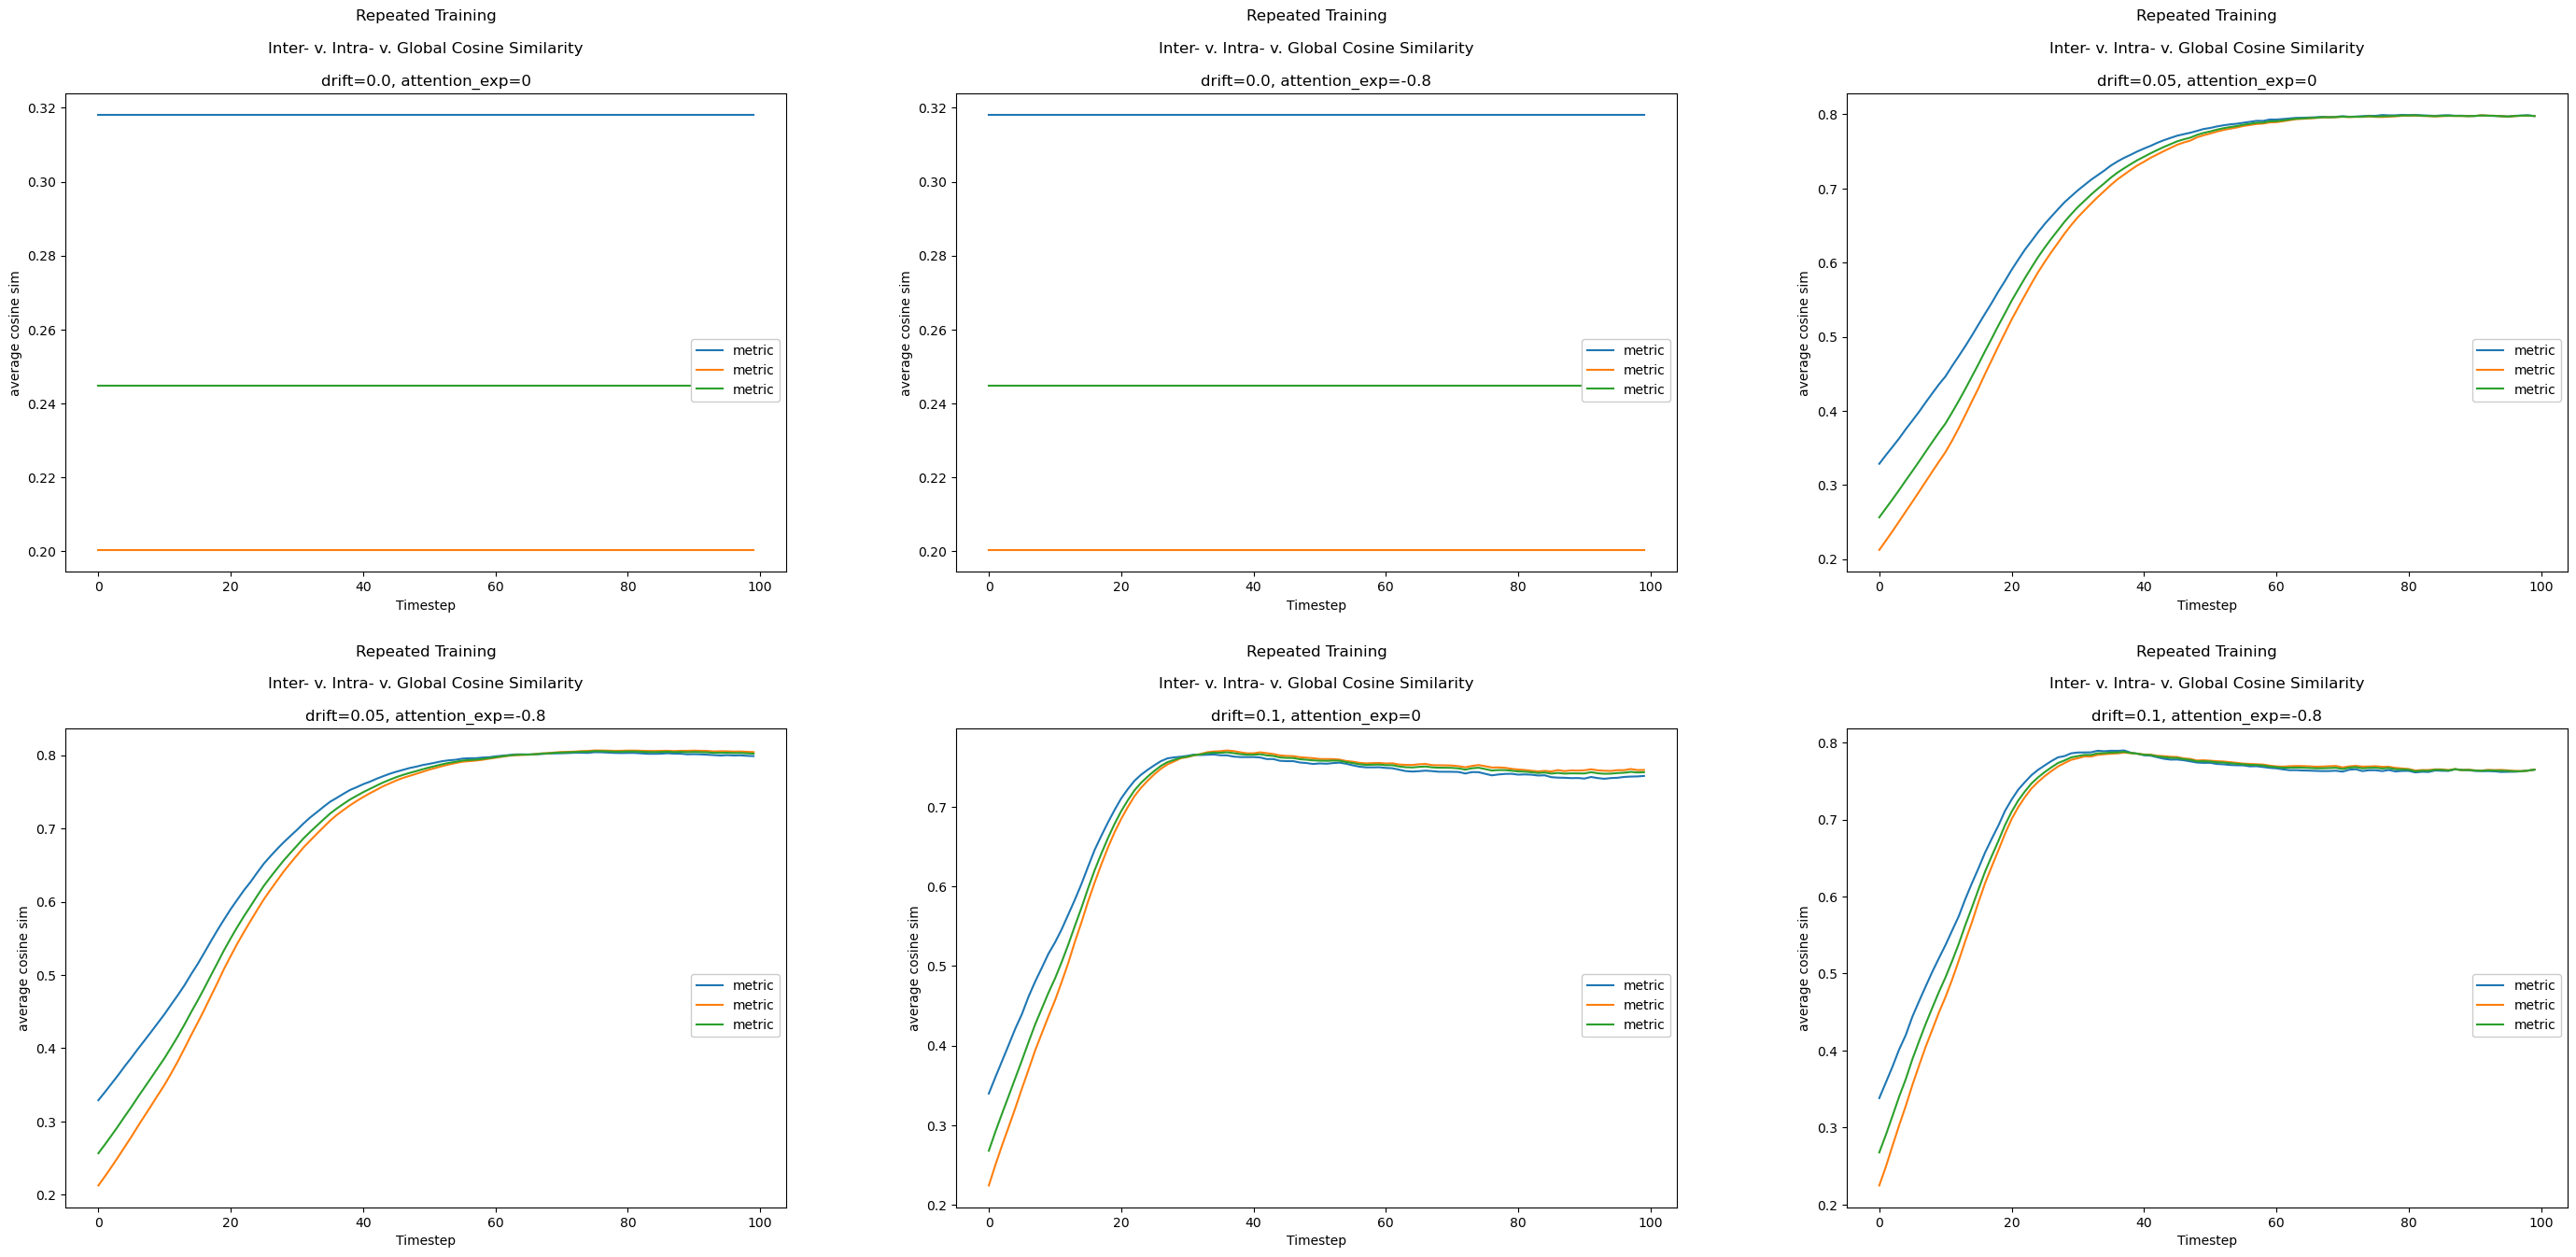

In [106]:
"""
Repeated training
"""
metric_keys = ["mean_intra_cluster_cosine_sim", "mean_inter_cluster_cosine_sim", "mean_global_cosine_sim"]

fig, axs = plt.subplots(2, 3, figsize=(30, 15))
fig.tight_layout(pad=10.0)

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_metrics_by_axis(curr_ax, results, metric_keys[0], (model_key_pairs[i][1],), id_to_readable, mult_sd=0, label="metric")
    graph_metrics_by_axis(curr_ax, results, metric_keys[1], (model_key_pairs[i][1],), id_to_readable, mult_sd=0, label="metric")
    graph_metrics_by_axis(curr_ax, results, metric_keys[2], (model_key_pairs[i][1],), id_to_readable, mult_sd=0, label="metric")
    
    # curr_ax.set_xlim(75, 100)
    # if i > 3:
    #     curr_ax.set_ylim(0.65, 0.75)
    # elif i > 1:
    #     curr_ax.set_ylim(0.7, 0.8)
    curr_ax.set_ylabel(y_labels[metric_keys[0]])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"Repeated Training\n\nInter- v. Intra- v. Global Cosine Similarity\n\ndrift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")

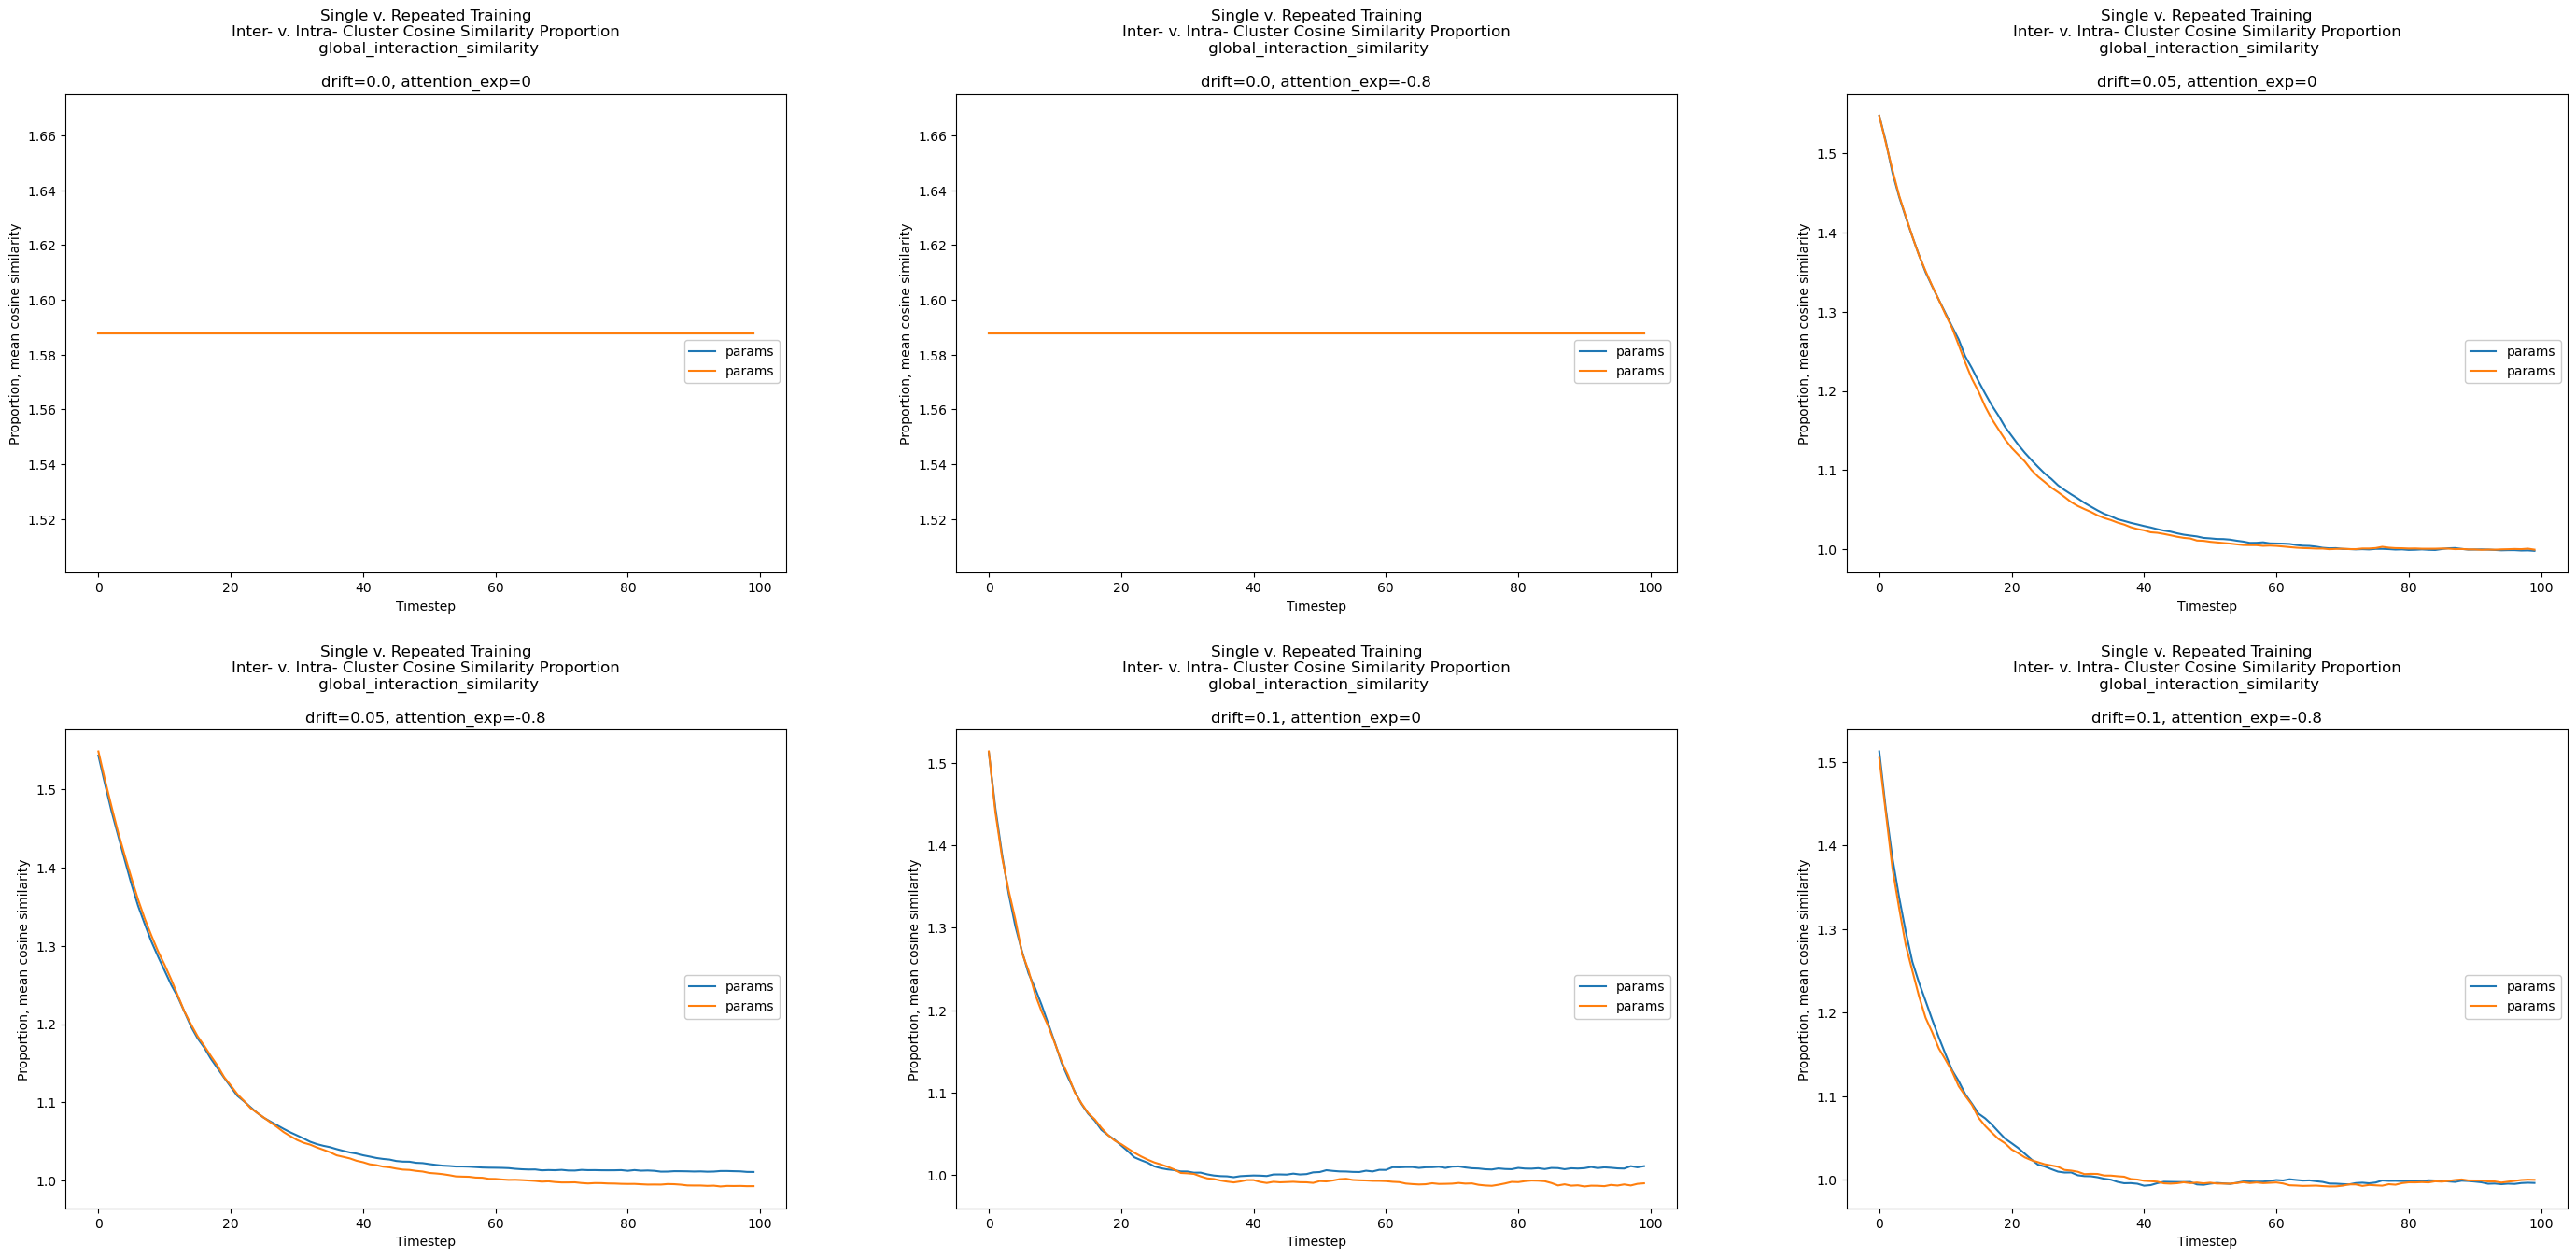

In [107]:
numerator = "mean_intra_cluster_cosine_sim"
denominator = "mean_inter_cluster_cosine_sim"

fig, axs = plt.subplots(2, 3, figsize=(30, 15))
fig.tight_layout(pad=10.0)

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_relative_to_global_by_axis(curr_ax, results, denominator, numerator, model_key_pairs[i], id_to_readable, mult_sd=0)
    curr_ax.set_ylabel("Proportion, mean cosine similarity")
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"Single v. Repeated Training\nInter- v. Intra- Cluster Cosine Similarity Proportion\n {global_metric_key}\n\ndrift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")

# Graphing `Distance from centroid`

### Graphing `mean_cluster_distance_from_centroid`

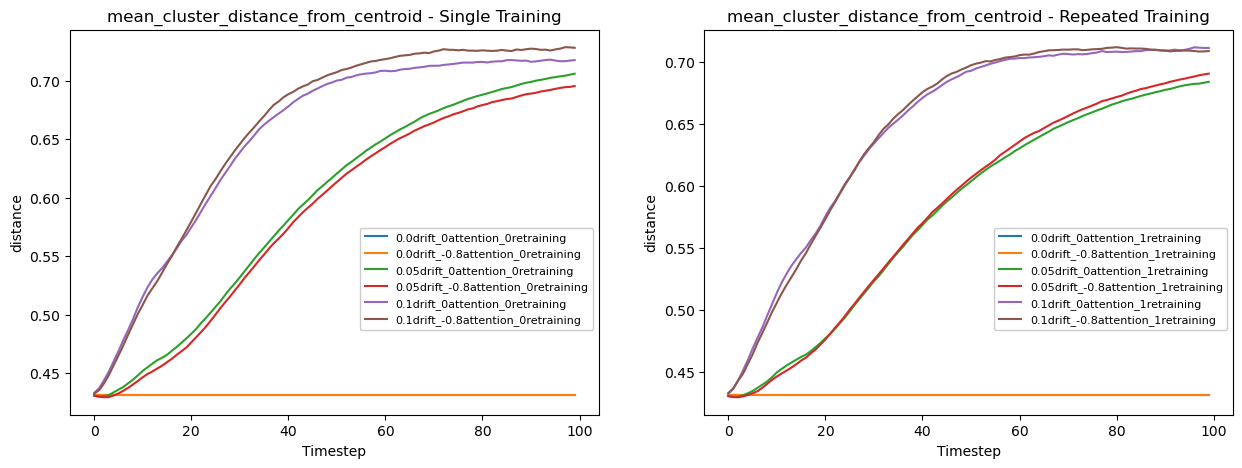

In [108]:
metric_key = "mean_cluster_distance_from_centroid"

single_training_keys = [key[0] for key in model_key_pairs]
repeated_training_keys = [key[1] for key in model_key_pairs]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

graph_metrics_by_axis(axs[0], results, metric_key, single_training_keys, id_to_readable, mult_sd=0)
axs[0].set_ylabel(y_labels[metric_key])
axs[0].set_xlabel("Timestep")
axs[0].set_title(f"{metric_key} - Single Training")
axs[0].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

graph_metrics_by_axis(axs[1], results, metric_key, repeated_training_keys, id_to_readable, mult_sd=0)
axs[1].set_ylabel(y_labels[metric_key])
axs[1].set_xlabel("Timestep")
axs[1].set_title(f"{metric_key} - Repeated Training")
axs[1].legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5), fontsize="8",)

#### Graphing **`Intra-Cluster Distance`** relative to `Global Distance`

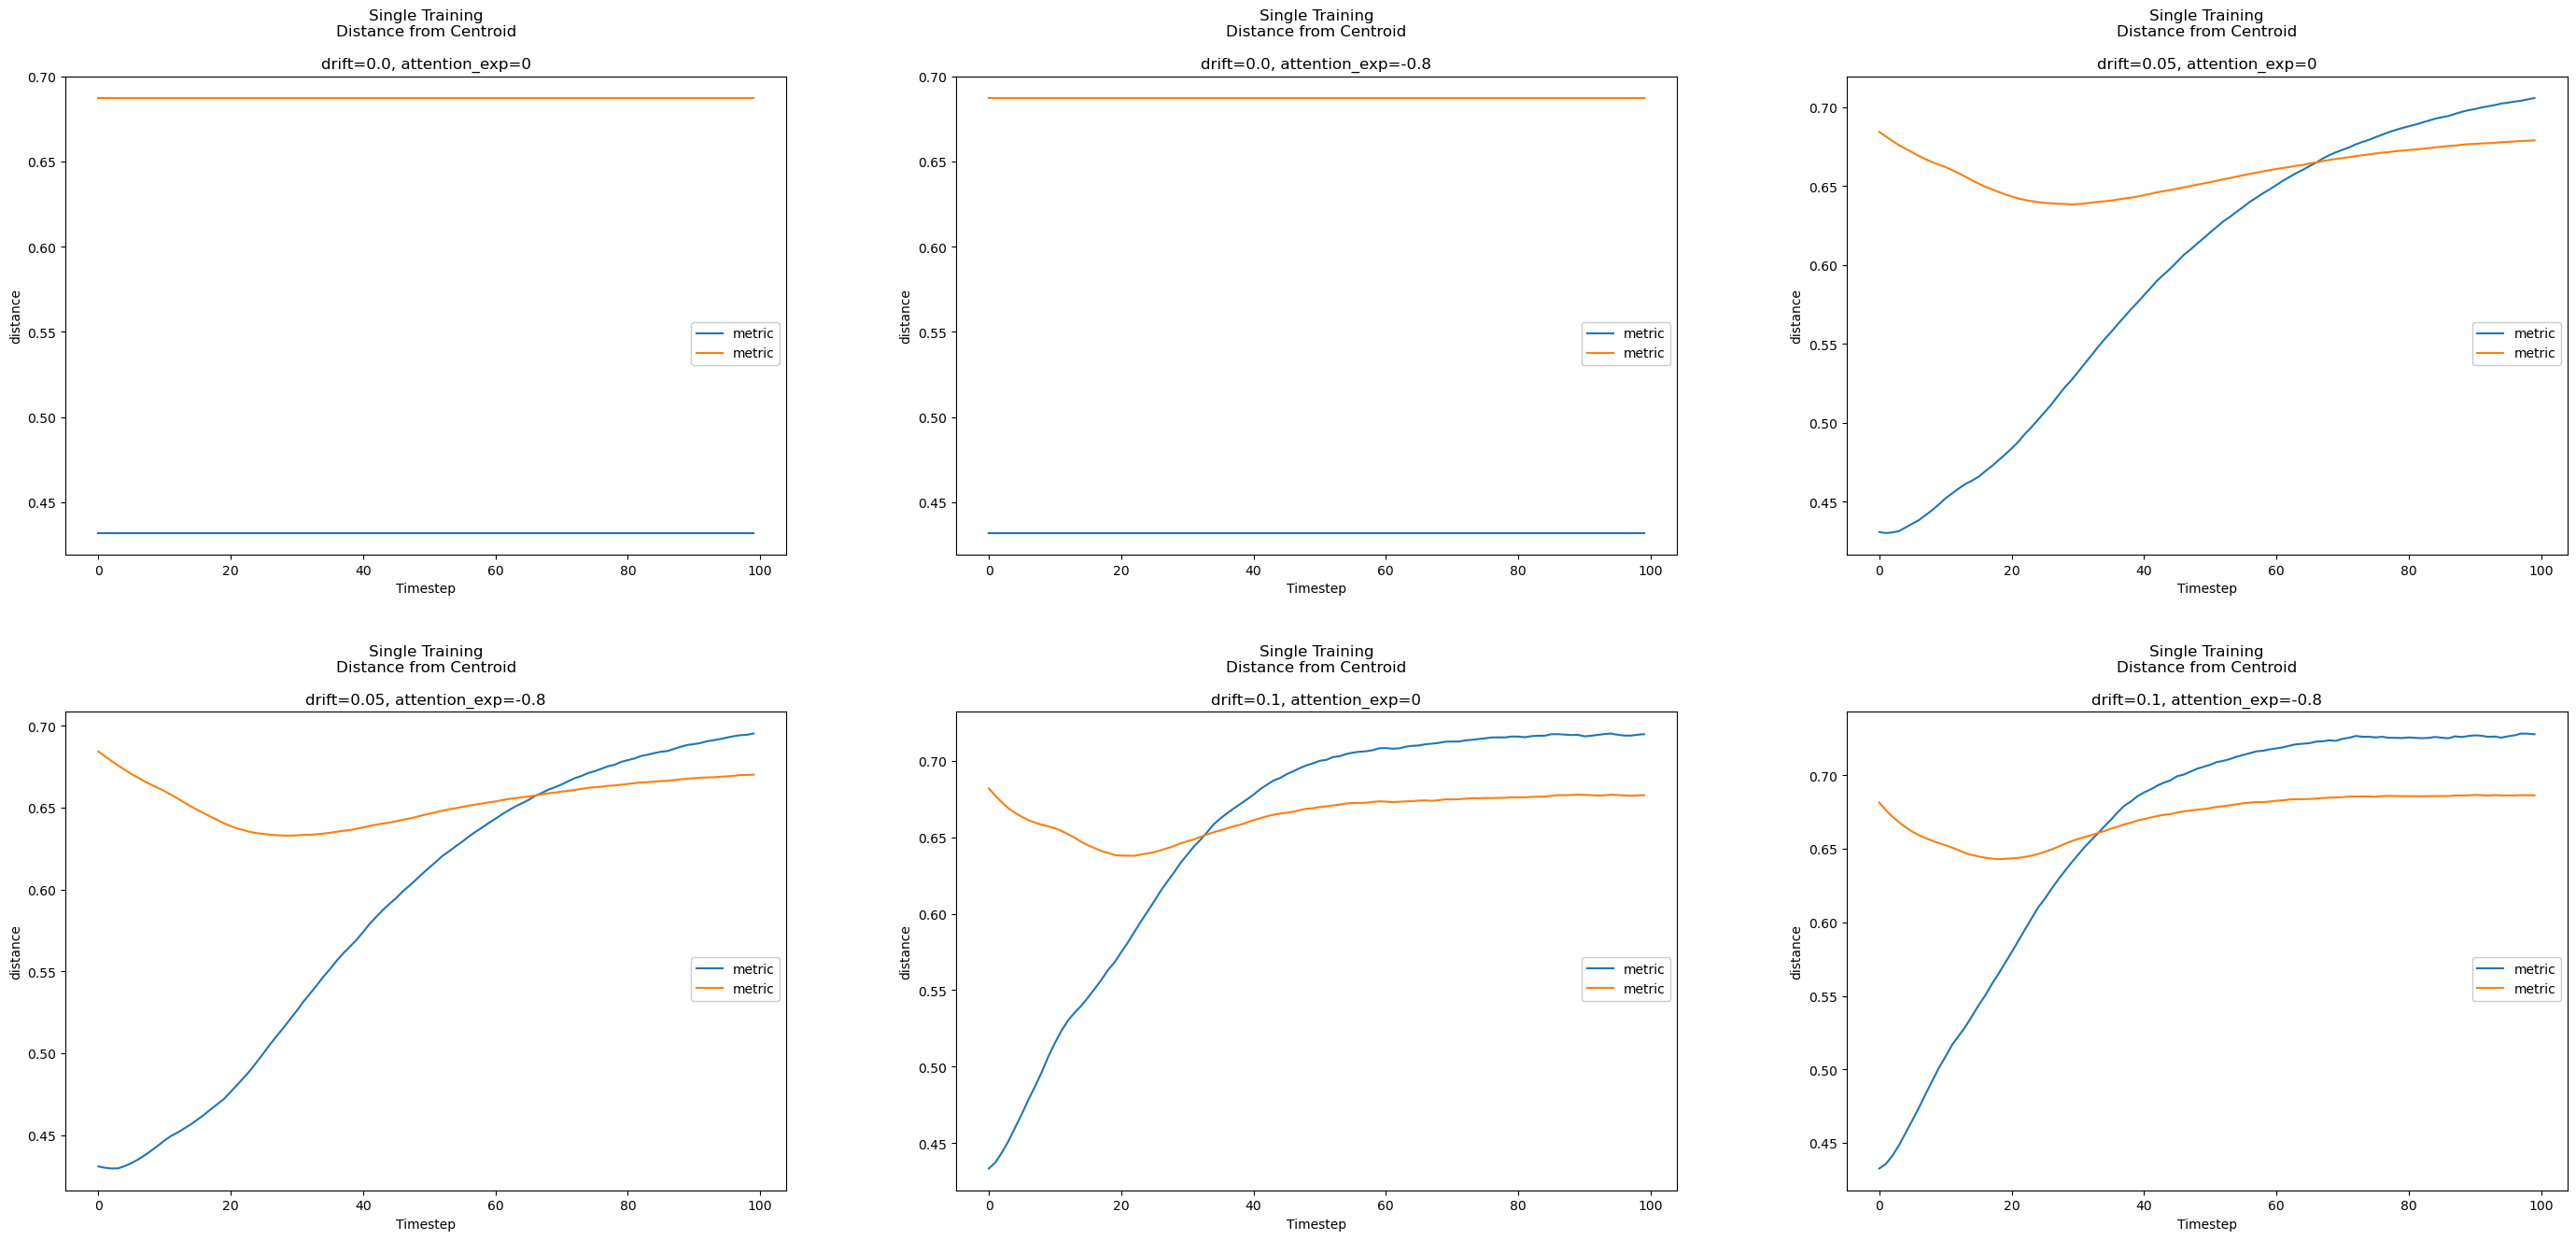

In [109]:
"""
Single training
"""
metric_keys = ['mean_cluster_distance_from_centroid', 'mean_global_distance_from_centroid']

fig, axs = plt.subplots(2, 3, figsize=(30, 15))
fig.tight_layout(pad=10.0)

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_metrics_by_axis(curr_ax, results, metric_keys[0], (model_key_pairs[i][0],), id_to_readable, mult_sd=0, label="metric")
    graph_metrics_by_axis(curr_ax, results, metric_keys[1], (model_key_pairs[i][0],), id_to_readable, mult_sd=0, label="metric")
    curr_ax.set_ylabel(y_labels[metric_keys[0]])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"Single Training\nDistance from Centroid\n\ndrift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")

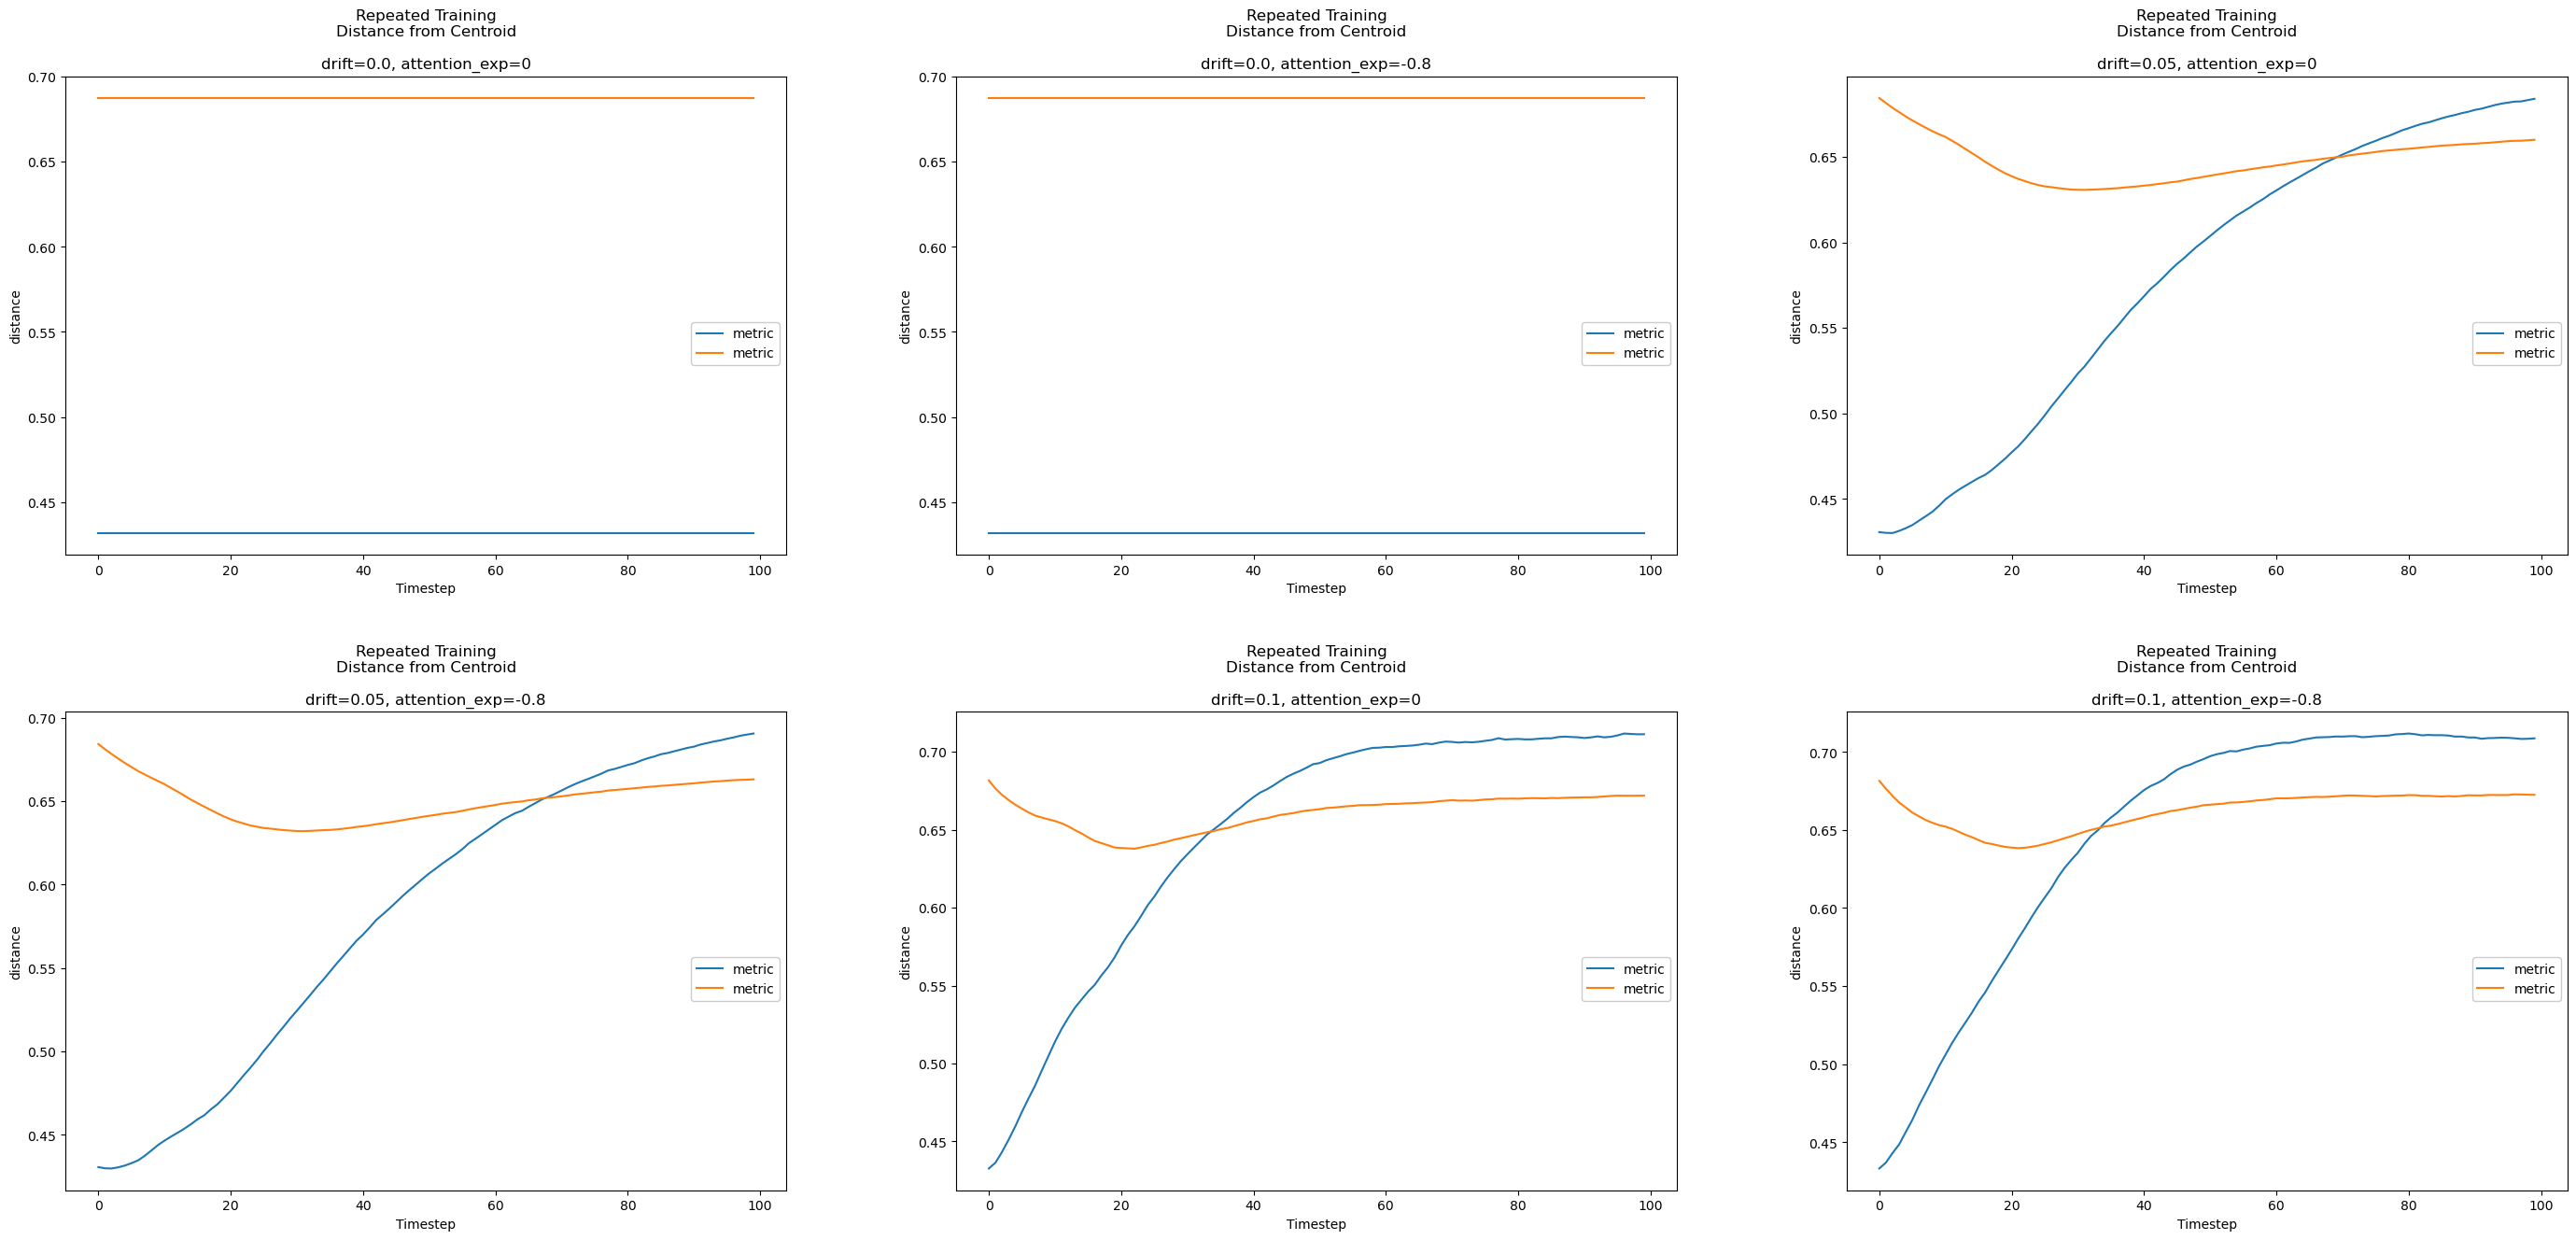

In [110]:
"""
Repeated training
"""
metric_keys = ['mean_cluster_distance_from_centroid', 'mean_global_distance_from_centroid']

fig, axs = plt.subplots(2, 3, figsize=(30, 15))
fig.tight_layout(pad=10.0)

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_metrics_by_axis(curr_ax, results, metric_keys[0], (model_key_pairs[i][1],), id_to_readable, mult_sd=0, label="metric")
    graph_metrics_by_axis(curr_ax, results, metric_keys[1], (model_key_pairs[i][1],), id_to_readable, mult_sd=0, label="metric")
    curr_ax.set_ylabel(y_labels[metric_keys[0]])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"Repeated Training\nDistance from Centroid\n\ndrift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")

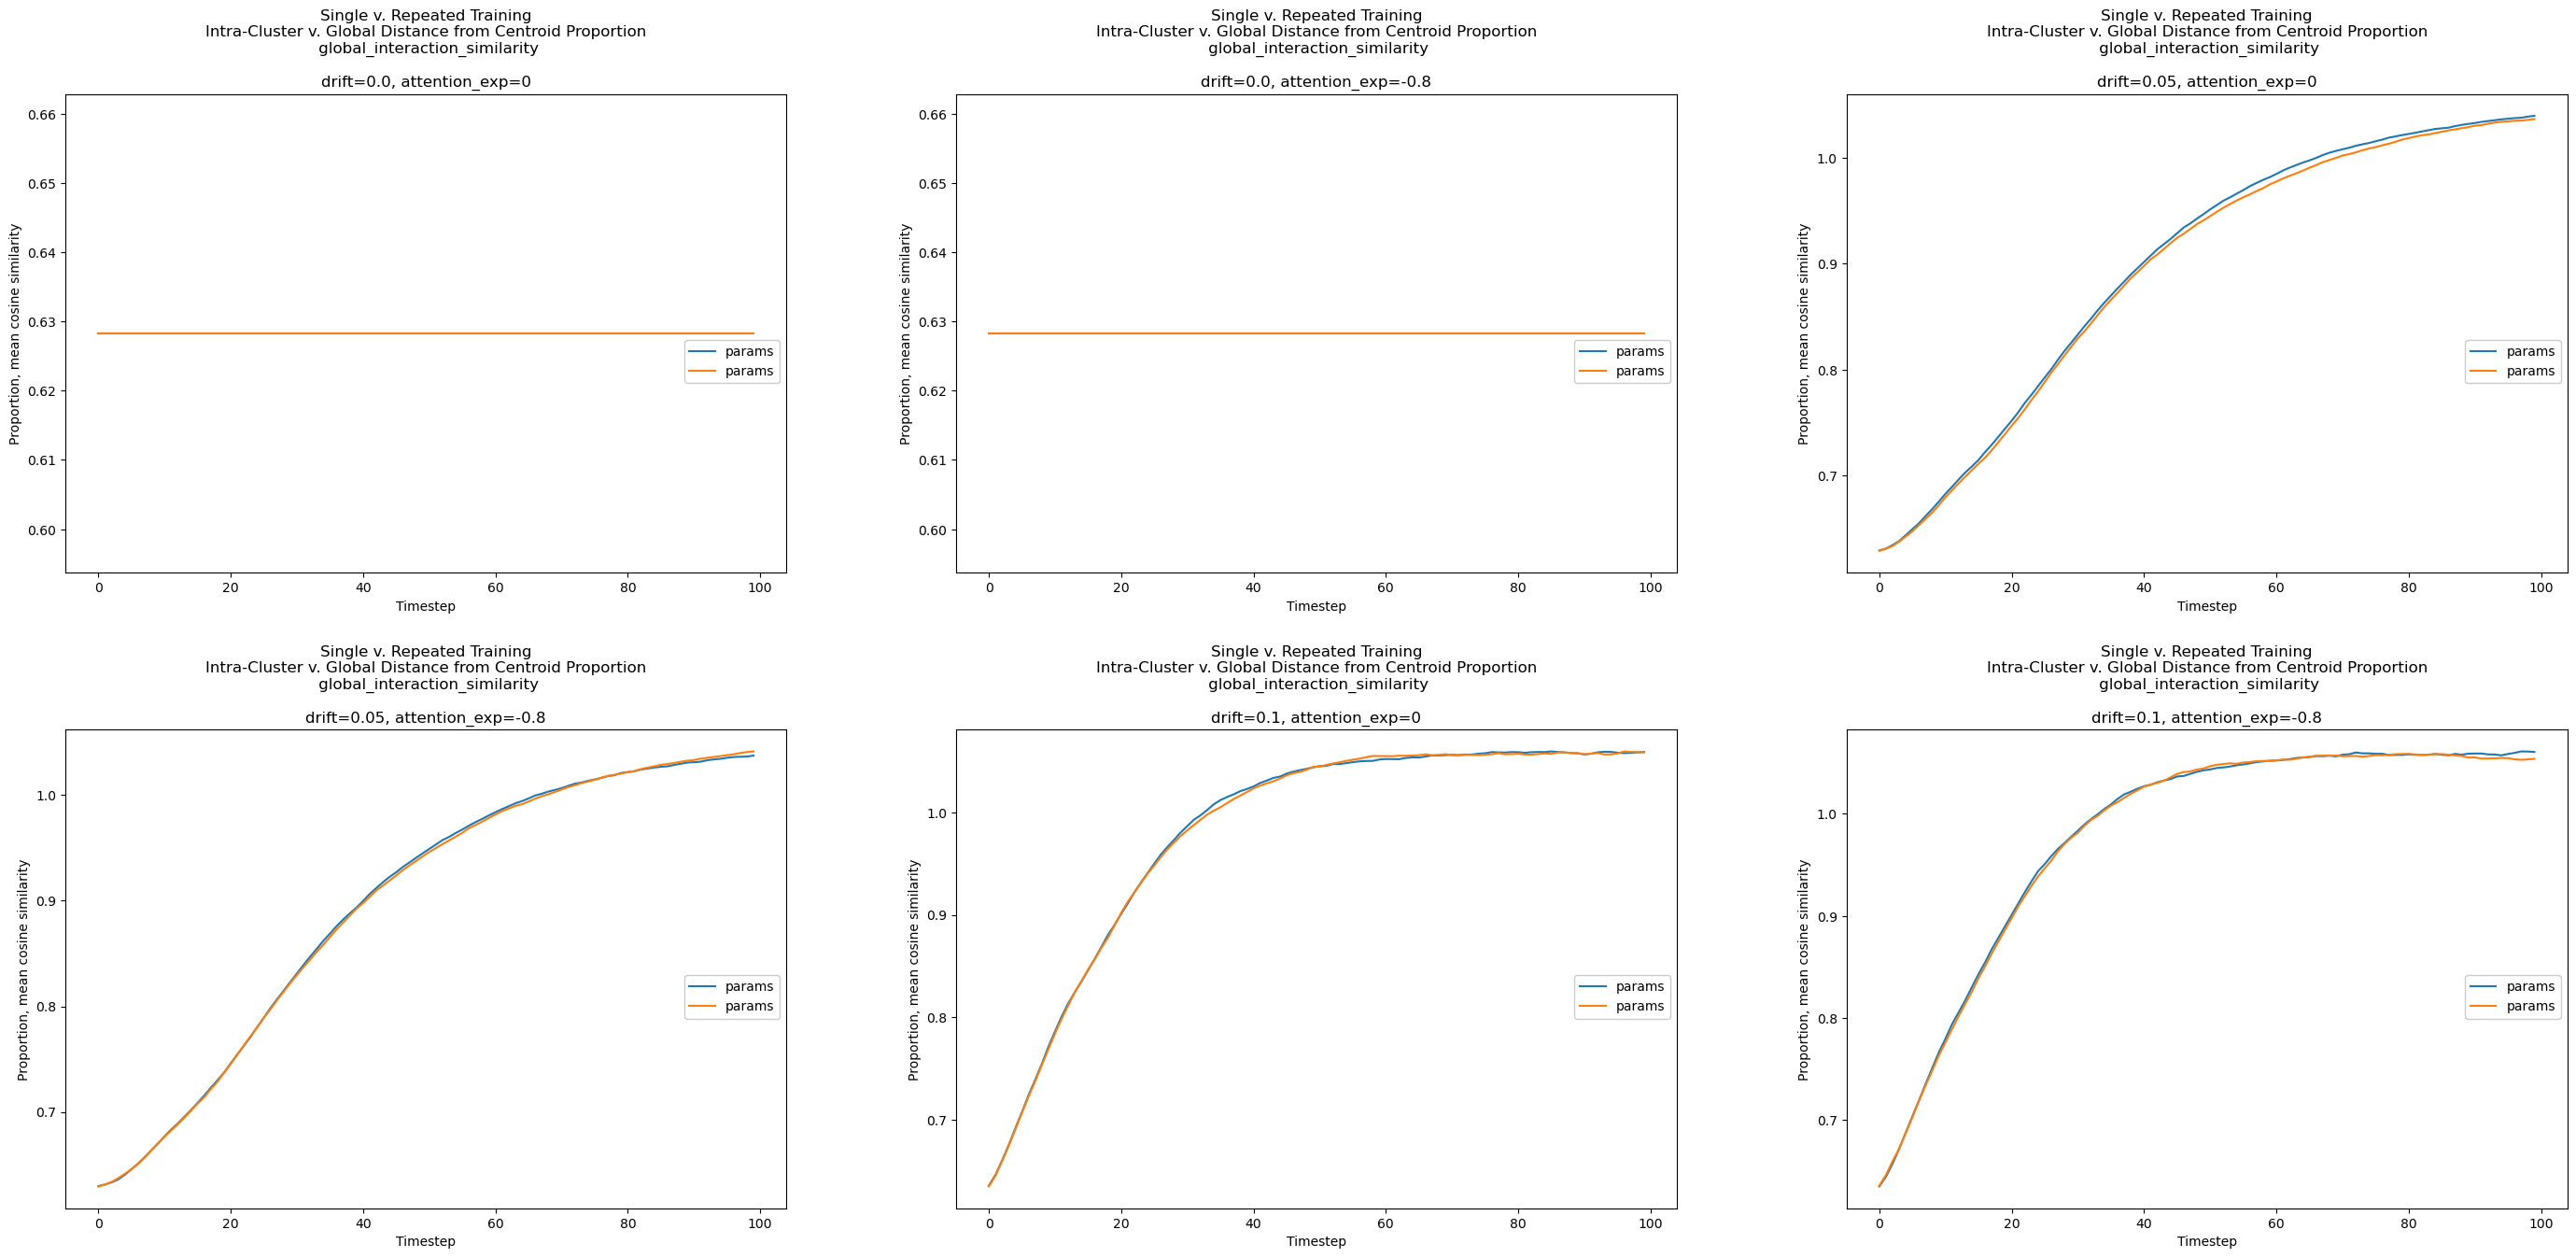

In [111]:
numerator = "mean_cluster_distance_from_centroid"
denominator = "mean_global_distance_from_centroid"

fig, axs = plt.subplots(2, 3, figsize=(30, 15))
fig.tight_layout(pad=10.0)

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_relative_to_global_by_axis(curr_ax, results, denominator, numerator, model_key_pairs[i], id_to_readable, mult_sd=0)
    # curr_ax.set_xlim(50, 100)
    # if i > 1:
    #     curr_ax.set_ylim(0.9, 1.1)
    curr_ax.set_ylabel("Proportion, mean cosine similarity")
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"Single v. Repeated Training\nIntra-Cluster v. Global Distance from Centroid Proportion\n {global_metric_key}\n\ndrift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")